In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import datetime
from collections import Counter

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

from nltk import FreqDist, pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize, WhitespaceTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [3]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, confusion_matrix, classification_report

In [4]:
!pip install imblearn

In [5]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [6]:
df = pd.read_csv('sample30.csv')

In [7]:
df.head(10)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative
5,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-04-20T00:00:00.000Z,False,False,1,My boyfriend and I bought this to spice things...,Not worth it,NaN,NaN,samantha,Negative
6,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-02-08T00:00:00.000Z,False,False,1,Bought this earlier today and was excited to c...,Disappointing,NaN,NaN,raeanne,Negative
7,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-02-21T00:00:00.000Z,False,False,1,I bought this product for my husband and I to ...,Not happy at all,NaN,NaN,kimmie,Negative
8,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-03-28T00:00:00.000Z,False,False,1,My husband and I bought this for some extra fu...,Very disappointing,NaN,NaN,cassie,Negative
9,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-03-21T00:00:00.000Z,False,False,1,Got as a surprise for my husband there is noth...,Don't buy,NaN,NaN,moore222,Positive


In [19]:
# Whenever the do recommend is false, sentiment is set to Negative
df.loc[df['reviews_doRecommend'] == False,'user_sentiment'] = 'Negative'

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [22]:
df.isnull().sum()

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
dtype: int64

In [23]:
# we are removing the no data rows for the following columns
df = df[~df['reviews_doRecommend'].isnull()]
df = df[~df['reviews_username'].isnull()]
df = df[~df['user_sentiment'].isnull()]

In [24]:
df.shape

(27395, 15)

In [25]:
df.isnull().sum()

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date                0
reviews_didPurchase     11925
reviews_doRecommend         0
reviews_rating              0
reviews_text                0
reviews_title              24
reviews_userCity        25834
reviews_userProvince    27300
reviews_username            0
user_sentiment              0
dtype: int64

In [26]:
# For title column we need to cobination of values of title and review
df['review_title_text'] = df['reviews_title'].fillna('') + ' ' + df['reviews_text']

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27395 entries, 3 to 29999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    27395 non-null  object
 1   brand                 27395 non-null  object
 2   categories            27395 non-null  object
 3   manufacturer          27254 non-null  object
 4   name                  27395 non-null  object
 5   reviews_date          27395 non-null  object
 6   reviews_didPurchase   15470 non-null  object
 7   reviews_doRecommend   27395 non-null  object
 8   reviews_rating        27395 non-null  int64 
 9   reviews_text          27395 non-null  object
 10  reviews_title         27371 non-null  object
 11  reviews_userCity      1561 non-null   object
 12  reviews_userProvince  95 non-null     object
 13  reviews_username      27395 non-null  object
 14  user_sentiment        27395 non-null  object
 15  review_title_text     27395 non-null

In [28]:
df.isnull().sum()

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date                0
reviews_didPurchase     11925
reviews_doRecommend         0
reviews_rating              0
reviews_text                0
reviews_title              24
reviews_userCity        25834
reviews_userProvince    27300
reviews_username            0
user_sentiment              0
review_title_text           0
dtype: int64

Lets convert the user_sentiment to Negative wherever we find reviews_doRecommend as False or reviews_rating less than 3.

In [30]:
df.loc[df['reviews_doRecommend'] == False,'user_sentiment'].value_counts()

Negative    1550
Name: user_sentiment, dtype: int64

In [31]:
def checkSentiment(row):
    if ((not row.reviews_doRecommend) or (row.reviews_rating < 3)):
        return 'Negative'
    return 'Positive'  

In [33]:
df['sentiment_mod'] = df.apply(lambda x : checkSentiment(x), axis = 1)

In [34]:
df['sentiment_mod'].value_counts()

Positive    25746
Negative     1649
Name: sentiment_mod, dtype: int64

In [35]:
df['user_sentiment'].value_counts()

Positive    23465
Negative     3930
Name: user_sentiment, dtype: int64

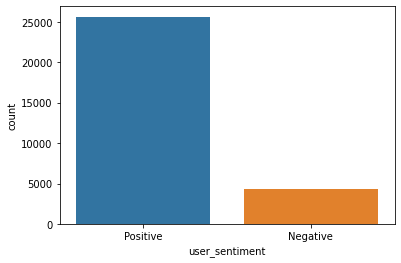

In [20]:
plt.figure()
sns.countplot(x = 'user_sentiment', data = df)
plt.show()

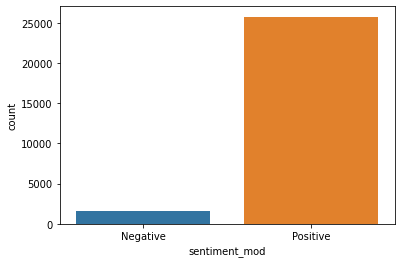

In [36]:
plt.figure()
sns.countplot(x = 'sentiment_mod', data = df)
plt.show()

In [37]:
def get_wordnet_pos_tags(pos):
    if pos.startswith('J'):
        return wordnet.ADJ
    elif pos.startswith('V'):
        return wordnet.VERB
    elif pos.startswith('R'):
        return wordnet.ADV
    return wordnet.NOUN

In [38]:
stopwords_list = set(stopwords.words('english')) - {"doesn't", "don't", "can't", "won't", "isn't", "wasn't", "shouldn't", "wouldn't", "couldn't",
                       "no", "not", "never", "nothing", "neither", "none", "nowhere"}

def clean_text(text):
    # lowering text
    text = text.lower()
    
    # tokenize text and remove puncutation
    text = [word.replace('[^\w\s]','') for word in text.split(' ')]
    
    # removing words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    
    # removing stopwords and keeping our negative words for negative reviews
    text = [x for x in text if x not in stopwords_list]
    
    # removing empty tokens
    text = [t for t in text if len(t) > 0]
    
    # getting pos tags
    pos_tags = pos_tag(text)
    
    # Lemmetizing Text
    text = [WordNetLemmatizer().lemmatize(word[0], get_wordnet_pos_tags(word[1])) for word in pos_tags]
    
    # removing word which are only 1 letter
    text = [word for word in text if len(word) > 1]
    
    # concatenating words
    text = ' '.join(text)
    
    return text

In [39]:
time1 = time.time()

df['clean_review'] = df.apply(lambda x : clean_text(x['review_title_text']), axis = 1)

time_taken = time.time() - time1
print('Time Taken: {:.2f} seconds'.format(time_taken))

Time Taken: 49.09 seconds


In [41]:
df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment,review_title_text,sentiment_mod,clean_review
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative,Disappointed I read through the reviews on her...,Negative,disappoint read review look buy one couple lub...
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative,Irritation My husband bought this gel for us. ...,Negative,irritation husband buy gel us. gel cause irrit...
5,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-04-20T00:00:00.000Z,False,False,1,My boyfriend and I bought this to spice things...,Not worth it,NaN,NaN,samantha,Negative,Not worth it My boyfriend and I bought this to...,Negative,not worth boyfriend bought spice thing bedroom...
6,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-02-08T00:00:00.000Z,False,False,1,Bought this earlier today and was excited to c...,Disappointing,NaN,NaN,raeanne,Negative,Disappointing Bought this earlier today and wa...,Negative,disappoint buy earlier today excite check out....
7,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-02-21T00:00:00.000Z,False,False,1,I bought this product for my husband and I to ...,Not happy at all,NaN,NaN,kimmie,Negative,Not happy at all I bought this product for my ...,Negative,not happy buy product husband try not impresse...


In [43]:
# resetting index
df.reset_index(inplace = True, drop = True)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment,review_title_text,sentiment_mod,clean_review
0,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative,Disappointed I read through the reviews on her...,Negative,disappoint read review look buy one couple lub...
1,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative,Irritation My husband bought this gel for us. ...,Negative,irritation husband buy gel us. gel cause irrit...
2,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-04-20T00:00:00.000Z,False,False,1,My boyfriend and I bought this to spice things...,Not worth it,NaN,NaN,samantha,Negative,Not worth it My boyfriend and I bought this to...,Negative,not worth boyfriend bought spice thing bedroom...
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-02-08T00:00:00.000Z,False,False,1,Bought this earlier today and was excited to c...,Disappointing,NaN,NaN,raeanne,Negative,Disappointing Bought this earlier today and wa...,Negative,disappoint buy earlier today excite check out....
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-02-21T00:00:00.000Z,False,False,1,I bought this product for my husband and I to ...,Not happy at all,NaN,NaN,kimmie,Negative,Not happy at all I bought this product for my ...,Negative,not happy buy product husband try not impresse...


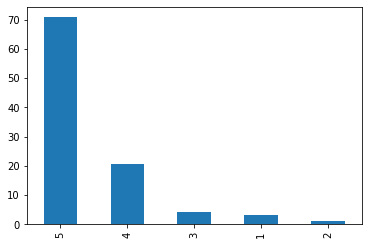

In [44]:
percent_val2 = 100 * df['reviews_rating'].value_counts()/len(df)
percent_val2.plot.bar()
plt.show()

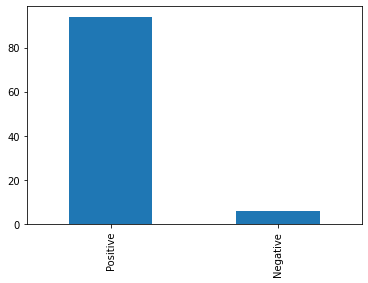

In [45]:
percent_val = 100 * df['sentiment_mod'].value_counts()/len(df)
percent_val.plot.bar()
plt.show()

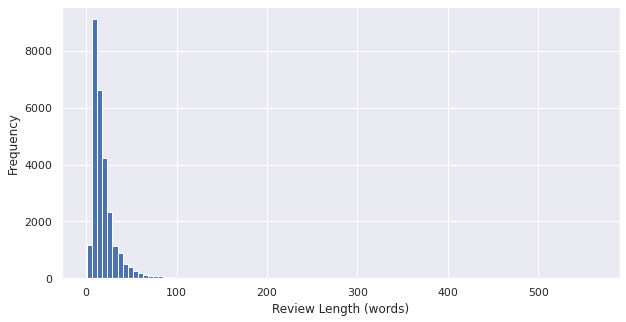

In [46]:
sns.set(font_scale=1)
plt.figure(figsize = (10,5))
words_per_review = df.clean_review.apply(lambda x: len(x.split(' ')))
words_per_review.hist(bins = 100)
plt.xlabel('Review Length (words)')
plt.ylabel('Frequency')
plt.show()

In [47]:
print('Average words:', words_per_review.mean())
print('Skewness:', words_per_review.skew())

Average words: 19.192589888665815
Skewness: 5.177820584743163


**Word Clods for the Clean Reviews**

In [48]:
# Based on Sentiment Mod
positive_reviews = df.loc[df.sentiment_mod=='Positive',['clean_review']]
negative_reviews = df.loc[df.sentiment_mod=='Negative',['clean_review']]

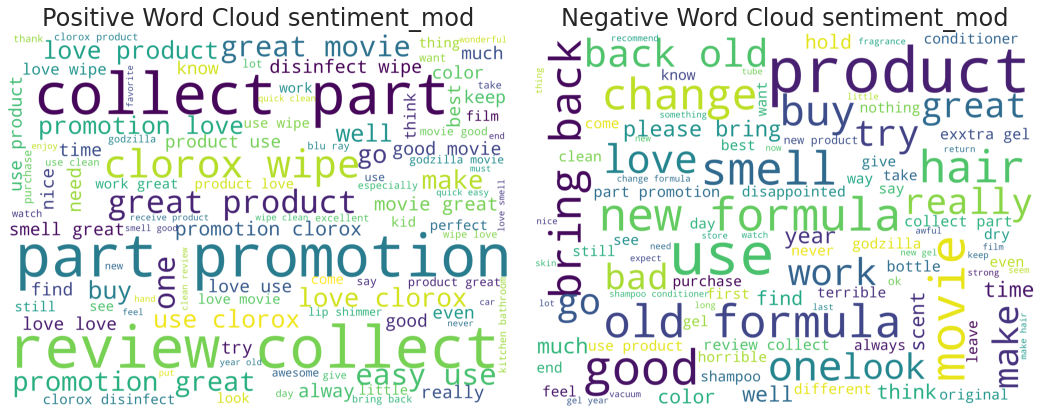

In [49]:
sns.set(font_scale=2)
plt.figure(figsize = (15,10))

plt.subplot(1, 2, 1)
plt.title('Positive Word Cloud sentiment_mod')

word_cloud_text = ''.join(positive_reviews['clean_review'])
wordcloud = WordCloud(max_font_size = 100, # Maximum font size for the largest word
                      max_words = 100, # The maximum number of words
                      background_color = 'White', # Background color for the word cloud image
                      scale = 10, # Scaling between computation and drawing
                      width = 800, # Width of the canvas
                      height = 600 # Height of the canvas
                     ).generate(word_cloud_text)

plt.imshow(wordcloud, interpolation='bilinear') # to make the displayed image appear more smoothly
plt.axis('off')
plt.tight_layout()

# wordcloud for negative reviews

plt.subplot(1, 2, 2)
plt.title('Negative Word Cloud sentiment_mod')

word_cloud_text = ''.join(negative_reviews['clean_review'])

wordcloud = WordCloud(max_font_size = 100, # Maximum font size for the largest word
                      max_words = 100, # The maximum number of words
                      background_color = 'White', # Background color for the word cloud image
                      scale = 10, # Scaling between computation and drawing
                      width = 800, # Width of the canvas
                      height = 600 # Height of the canvas
                     ).generate(word_cloud_text)

plt.imshow(wordcloud, interpolation='bilinear') # to make the displayed image appear more smoothly
plt.axis("off")
plt.tight_layout()

In [50]:
# Based on User Sentiment
positive_reviews = df.loc[df.user_sentiment=='Positive',['clean_review']]
negative_reviews = df.loc[df.user_sentiment=='Negative',['clean_review']]

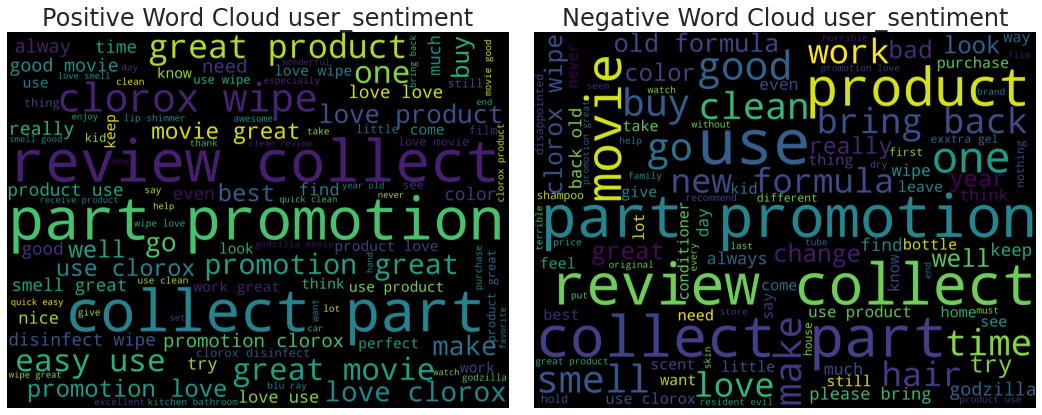

In [51]:
sns.set(font_scale=2)
plt.figure(figsize = (15,10))

plt.subplot(1, 2, 1)
plt.title('Positive Word Cloud user_sentiment')

word_cloud_text = ''.join(positive_reviews['clean_review'])
wordcloud = WordCloud(max_font_size = 100, # Maximum font size for the largest word
                      max_words = 100, # The maximum number of words
                      background_color = 'rgb(0, 0, 0)', # Background color for the word cloud image
                      mode = 'RGB',
                      scale = 10, # Scaling between computation and drawing
                      width = 800, # Width of the canvas
                      height = 600 # Height of the canvas
                     ).generate(word_cloud_text)

plt.imshow(wordcloud, interpolation='bilinear') # to make the displayed image appear more smoothly
plt.axis('off')
plt.tight_layout()

# wordcloud for negative reviews

plt.subplot(1, 2, 2)
plt.title('Negative Word Cloud user_sentiment')

word_cloud_text = ''.join(negative_reviews['clean_review'])

wordcloud = WordCloud(max_font_size = 100, # Maximum font size for the largest word
                      max_words = 100, # The maximum number of words
                      background_color = 'rgb(0, 0, 0)', # Background color for the word cloud image
                      mode = 'RGB',
                      scale = 10, # Scaling between computation and drawing
                      width = 800, # Width of the canvas
                      height = 600 # Height of the canvas
                     ).generate(word_cloud_text)

plt.imshow(wordcloud, interpolation='bilinear') # to make the displayed image appear more smoothly
plt.axis("off")
plt.tight_layout()

Lets map Positive sentiment to 1 and Negative to 0

In [52]:
df['sentiment_mapped'] = np.where(df['sentiment_mod'] == 'Positive', 1, 0)

In [53]:
df['sentiment_mapped'].value_counts()

1    25746
0     1649
Name: sentiment_mapped, dtype: int64

Creating Tf-Idf features

In [54]:
word_vectorizer = TfidfVectorizer(
    strip_accents = 'unicode',
    analyzer = 'word',
    token_pattern = r'\w{1,}',
    tokenizer= word_tokenize,
    ngram_range = (1, 3),
    stop_words = stopwords_list,
    sublinear_tf = True)

tfidf_data = word_vectorizer.fit_transform(df['clean_review'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'might', 'must', "n't", 'need', 'sha'] not in stop_words.
  % sorted(inconsistent)


In [55]:
tfidf_data

<27395x544294 sparse matrix of type '<class 'numpy.float64'>'
	with 1646955 stored elements in Compressed Sparse Row format>

In [56]:
import pickle

def saveModel(filename, model):
  with open(filename, 'wb') as file:
    pickle.dump(model, file)

def loadModel(filename):
  with open(filename, 'rb') as file:
    loadedModel = pickle.load(file)
    return loadedModel

In [57]:
saveModel('tfidf_vectorizer.pkl', word_vectorizer)

In [58]:
loadModel('tfidf_vectorizer.pkl')

TfidfVectorizer(ngram_range=(1, 3),
                stop_words={'a', 'about', 'above', 'after', 'again', 'against',
                            'ain', 'all', 'am', 'an', 'and', 'any', 'are',
                            'aren', "aren't", 'as', 'at', 'be', 'because',
                            'been', 'before', 'being', 'below', 'between',
                            'both', 'but', 'by', 'can', 'couldn', 'd', ...},
                strip_accents='unicode', sublinear_tf=True,
                token_pattern='\\w{1,}',
                tokenizer=<function word_tokenize at 0x7f429df3a3b0>)

Spliting Test and Train Data

In [59]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf =  train_test_split(tfidf_data, df['sentiment_mapped'], test_size = 0.2, random_state = 3)

In [60]:
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)
print(y_train_tfidf.shape)
print(y_test_tfidf.shape)

(21916, 544294)
(5479, 544294)
(21916,)
(5479,)


In [61]:
y_train_tfidf.value_counts()

1    20603
0     1313
Name: sentiment_mapped, dtype: int64

In [62]:
y_test_tfidf.value_counts()

1    5143
0     336
Name: sentiment_mapped, dtype: int64

Test: Logistic Regression

In [63]:
time1 = time.time()

lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train_tfidf.ravel())

time_taken = time.time() - time1
print('Time Taken: {:.2f} seconds'.format(time_taken))

Time Taken: 7.77 seconds


In [64]:
y_pred_train_lr = lr.predict(X_train_tfidf)

In [65]:
def printReport(y, pred):
    print(classification_report(y, pred))
    print('Accuracy : ', accuracy_score(y, pred))
    print('F1 score: ', f1_score(y, pred))
    print('Recall: ', recall_score(y, pred))
    print('Precision: ', precision_score(y, pred))
    print('')
    print('Confusion Matrix: ')
    print(confusion_matrix(pred, y))

In [66]:
print("Logistic Regression accuracy", accuracy_score(y_train_tfidf, y_pred_train_lr))
printReport(y_train_tfidf, y_pred_train_lr)

Logistic Regression accuracy 0.9567895601387114
              precision    recall  f1-score   support

           0       0.99      0.28      0.44      1313
           1       0.96      1.00      0.98     20603

    accuracy                           0.96     21916
   macro avg       0.97      0.64      0.71     21916
weighted avg       0.96      0.96      0.95     21916

Accuracy :  0.9567895601387114
F1 score:  0.9775299561039269
Recall:  0.9998058535164782
Precision:  0.9562250487419924

Confusion Matrix: 
[[  370     4]
 [  943 20599]]


In [67]:
y_pred_test_lr = lr.predict(X_test_tfidf)

#Model Performance on Test Dataset
print("Logistic Regression accuracy", accuracy_score(y_test_tfidf, y_pred_test_lr))
printReport(y_test_tfidf, y_pred_test_lr)

Logistic Regression accuracy 0.9525460850520168
              precision    recall  f1-score   support

           0       0.99      0.23      0.37       336
           1       0.95      1.00      0.98      5143

    accuracy                           0.95      5479
   macro avg       0.97      0.61      0.67      5479
weighted avg       0.95      0.95      0.94      5479

Accuracy :  0.9525460850520168
F1 score:  0.9753414264036419
Recall:  0.9998055609566401
Precision:  0.9520459174226995

Confusion Matrix: 
[[  77    1]
 [ 259 5142]]


We have highly imbalanced sentiments, to rebalance then we are using SMOTE

In [68]:
counter = Counter(y_train_tfidf)
print('Before', counter)

Before Counter({1: 20603, 0: 1313})


In [69]:
sm = SMOTE()

# transform the dataset
X_train_tfidf_sm, y_train_tfidf_sm = sm.fit_resample(X_train_tfidf, y_train_tfidf)

counter = Counter(y_train_tfidf_sm)
print('After', counter)

After Counter({1: 20603, 0: 20603})


In [70]:
time1 = time.time()

lr = LogisticRegression()
lr.fit(X_train_tfidf_sm, y_train_tfidf_sm.ravel())

time_taken = time.time() - time1
print('Time Taken: {:.2f} seconds'.format(time_taken))

Time Taken: 10.69 seconds


In [71]:
y_pred_train_lr_sm = lr.predict(X_train_tfidf_sm)

In [72]:
print("Logistic Regression accuracy", accuracy_score(y_train_tfidf_sm, y_pred_train_lr_sm))
printReport(y_train_tfidf_sm, y_pred_train_lr_sm)

Logistic Regression accuracy 0.9955346308789982
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     20603
           1       1.00      0.99      1.00     20603

    accuracy                           1.00     41206
   macro avg       1.00      1.00      1.00     41206
weighted avg       1.00      1.00      1.00     41206

Accuracy :  0.9955346308789982
F1 score:  0.9955207166853303
Recall:  0.9924282871426491
Precision:  0.9986324786324786

Confusion Matrix: 
[[20575   156]
 [   28 20447]]


In [73]:
y_pred_test_lr_sm = lr.predict(X_test_tfidf)
print("Logistic Regression accuracy", accuracy_score(y_test_tfidf, y_pred_test_lr_sm))
printReport(y_test_tfidf, y_pred_test_lr_sm)

Logistic Regression accuracy 0.9625844132140902
              precision    recall  f1-score   support

           0       0.72      0.64      0.68       336
           1       0.98      0.98      0.98      5143

    accuracy                           0.96      5479
   macro avg       0.85      0.81      0.83      5479
weighted avg       0.96      0.96      0.96      5479

Accuracy :  0.9625844132140902
F1 score:  0.9801375835674837
Recall:  0.9834726813144079
Precision:  0.9768250289687138

Confusion Matrix: 
[[ 216   85]
 [ 120 5058]]


In [74]:
saveModel('logistic_reg_model.pkl', lr)

In [75]:
loadModel('logistic_reg_model.pkl')

LogisticRegression()

Test: Random Forest Classifier

In [76]:
params = {
    'max_features': [10, 20, 30],
    'max_depth': [10, 15, 20],
    'min_samples_leaf': [50, 100, 150, 200],
    'min_samples_split': [100, 150, 200],
    'n_estimators': [100, 200, 300],
}

rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rf,
                          param_grid = params,
                          cv = 4,
                          scoring = 'precision',
                          n_jobs = -1,
                          verbose = 1)

In [ ]:
%%time
time1 = time.time()

grid_search.fit(X_train_tfidf_sm, y_train_tfidf_sm)

time_taken = time.time() - time1
print('Time Taken: {:.2f} seconds'.format(time_taken))

Without SMOTE

In [78]:
rfc = RandomForestClassifier(
    max_depth=20,
    max_features=20,
    min_samples_leaf=100,
    min_samples_split=200,
    n_estimators = 200,
    bootstrap = True,
    n_jobs = -1,
    verbose = 1)

In [79]:
time1 = time.time()

rfc.fit(X_train_tfidf, y_train_tfidf)

time_taken = time.time() - time1
print('Time Taken: {:.2f} seconds'.format(time_taken))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.4s


Time Taken: 1.89 seconds


[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.6s finished


In [82]:
y_pred_train_rfc = rfc.predict(X_train_tfidf)


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.3s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    3.3s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    3.4s finished


In [81]:
print("Random Forest Classifier accuracy", accuracy_score(y_train_tfidf, y_pred_train_rfc))
printReport(y_train_tfidf, y_pred_train_rfc)

Random Forest Classifier accuracy 0.9400894323781712
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1313
           1       0.94      1.00      0.97     20603

    accuracy                           0.94     21916
   macro avg       0.47      0.50      0.48     21916
weighted avg       0.88      0.94      0.91     21916

Accuracy :  0.9400894323781712
F1 score:  0.9691196876690421
Recall:  1.0
Precision:  0.9400894323781712

Confusion Matrix: 
[[    0     0]
 [ 1313 20603]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [83]:
y_pred_test_rfc = rfc.predict(X_test_tfidf)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    1.4s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    1.5s finished


In [84]:
print("Random Forest Classifier accuracy", accuracy_score(y_test_tfidf, y_pred_test_rfc))
printReport(y_test_tfidf, y_pred_test_rfc)

Random Forest Classifier accuracy 0.9386749406826063
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       336
           1       0.94      1.00      0.97      5143

    accuracy                           0.94      5479
   macro avg       0.47      0.50      0.48      5479
weighted avg       0.88      0.94      0.91      5479

Accuracy :  0.9386749406826063
F1 score:  0.968367539069855
Recall:  1.0
Precision:  0.9386749406826063

Confusion Matrix: 
[[   0    0]
 [ 336 5143]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


WIth SMOTE

In [85]:
rfc = RandomForestClassifier(
    max_depth = 15,
    max_features = 10,
    min_samples_leaf = 50,
    min_samples_split = 100,
    n_estimators = 200,
    bootstrap = True,
    n_jobs = -1,
    verbose = 1)

In [86]:
time1 = time.time()

rfc.fit(X_train_tfidf_sm, y_train_tfidf_sm)

time_taken = time.time() - time1
print('Time Taken: {:.2f} seconds'.format(time_taken))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.6s


Time Taken: 3.14 seconds


[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.4s finished


In [87]:
y_pred_train_rfc_sm = rfc.predict(X_train_tfidf_sm)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    4.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   14.8s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:   14.9s finished


In [88]:
# Model Performance on Train Dataset with SMOTE
print("Random Forest Classifier accuracy", accuracy_score(y_train_tfidf_sm, y_pred_train_rfc_sm))
printReport(y_train_tfidf_sm, y_pred_train_rfc_sm)

Random Forest Classifier accuracy 0.5401397854681357
              precision    recall  f1-score   support

           0       0.81      0.10      0.19     20603
           1       0.52      0.98      0.68     20603

    accuracy                           0.54     41206
   macro avg       0.67      0.54      0.43     41206
weighted avg       0.67      0.54      0.43     41206

Accuracy :  0.5401397854681357
F1 score:  0.6796395543458047
Recall:  0.9755860796971315
Precision:  0.521454885072381

Confusion Matrix: 
[[ 2157   503]
 [18446 20100]]


In [89]:
y_pred_test_rfc_sm = rfc.predict(X_test_tfidf)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    1.3s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    1.3s finished


In [90]:
# Model Performance on Test Dataset with SMOTE
print("Random Forest Classifier accuracy", accuracy_score(y_test_tfidf, y_pred_test_rfc_sm))
printReport(y_test_tfidf, y_pred_test_rfc_sm)

Random Forest Classifier accuracy 0.9184157693009674
              precision    recall  f1-score   support

           0       0.06      0.02      0.03       336
           1       0.94      0.98      0.96      5143

    accuracy                           0.92      5479
   macro avg       0.50      0.50      0.50      5479
weighted avg       0.89      0.92      0.90      5479

Accuracy :  0.9184157693009674
F1 score:  0.9574082896617438
Recall:  0.9768617538401712
Precision:  0.9387144992526159

Confusion Matrix: 
[[   8  119]
 [ 328 5024]]


Naive Bayes Classifier
Without SMOTE

In [91]:
nb = MultinomialNB()

In [92]:
time1 = time.time()

nb.fit(X_train_tfidf, y_train_tfidf)

time_taken = time.time() - time1
print('Time Taken: {:.2f} seconds'.format(time_taken))

Time Taken: 0.12 seconds


In [93]:
predict_train_nb = nb.predict(X_train_tfidf)

In [94]:
print("Naive Bayes Classifier accuracy", accuracy_score(y_train_tfidf, predict_train_nb))
printReport(y_train_tfidf, predict_train_nb)

Naive Bayes Classifier accuracy 0.9405913487862748
              precision    recall  f1-score   support

           0       1.00      0.01      0.02      1313
           1       0.94      1.00      0.97     20603

    accuracy                           0.94     21916
   macro avg       0.97      0.50      0.49     21916
weighted avg       0.94      0.94      0.91     21916

Accuracy :  0.9405913487862748
F1 score:  0.9693704714406699
Recall:  1.0
Precision:  0.9405615156356996

Confusion Matrix: 
[[   11     0]
 [ 1302 20603]]


In [95]:
# predicting test data
predict_test_nb = nb.predict(X_test_tfidf)

In [96]:
print("Naive Bayes Classifier accuracy", accuracy_score(y_test_tfidf, predict_test_nb))
printReport(y_test_tfidf, predict_test_nb)

Naive Bayes Classifier accuracy 0.9394050009125753
              precision    recall  f1-score   support

           0       1.00      0.01      0.02       336
           1       0.94      1.00      0.97      5143

    accuracy                           0.94      5479
   macro avg       0.97      0.51      0.50      5479
weighted avg       0.94      0.94      0.91      5479

Accuracy :  0.9394050009125753
F1 score:  0.9687323413072142
Recall:  1.0
Precision:  0.9393607305936073

Confusion Matrix: 
[[   4    0]
 [ 332 5143]]


With SMOTE

In [97]:
time1 = time.time()

nb.fit(X_train_tfidf_sm, y_train_tfidf_sm)

time_taken = time.time() - time1
print('Time Taken: {:.2f} seconds'.format(time_taken))

Time Taken: 0.17 seconds


In [98]:
# predicting train data
predict_train_nb_sm = nb.predict(X_train_tfidf_sm)

In [99]:
print("Naive Bayes Classifier accuracy", accuracy_score(y_train_tfidf_sm, predict_train_nb_sm))
printReport(y_train_tfidf_sm, predict_train_nb_sm)

Naive Bayes Classifier accuracy 0.9812891326505848
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     20603
           1       1.00      0.97      0.98     20603

    accuracy                           0.98     41206
   macro avg       0.98      0.98      0.98     41206
weighted avg       0.98      0.98      0.98     41206

Accuracy :  0.9812891326505848
F1 score:  0.9809944043187813
Recall:  0.9657816822792797
Precision:  0.9966940492887197

Confusion Matrix: 
[[20537   705]
 [   66 19898]]


In [100]:
# predicting test data
predict_test_nb_sm = nb.predict(X_test_tfidf)

In [101]:
print("Naive Bayes Classifier accuracy", accuracy_score(y_test_tfidf, predict_test_nb_sm))
printReport(y_test_tfidf, predict_test_nb_sm)

Naive Bayes Classifier accuracy 0.9118452272312466
              precision    recall  f1-score   support

           0       0.40      0.84      0.54       336
           1       0.99      0.92      0.95      5143

    accuracy                           0.91      5479
   macro avg       0.69      0.88      0.75      5479
weighted avg       0.95      0.91      0.93      5479

Accuracy :  0.9118452272312466
F1 score:  0.951256433545262
Recall:  0.9163912113552402
Precision:  0.9888795635753252

Confusion Matrix: 
[[ 283  430]
 [  53 4713]]


In [102]:
saveModel('naive_Bayes_model.pkl', nb)

In [103]:
loadModel('naive_Bayes_model.pkl')

MultinomialNB()

After executing different models we can infer that Logistic Regression model has performed better than either two models with or without SMOTE, so from we'll consider the Logistic Regression model as our final model for the prediction.

Recommendation System

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27395 entries, 0 to 27394
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    27395 non-null  object
 1   brand                 27395 non-null  object
 2   categories            27395 non-null  object
 3   manufacturer          27254 non-null  object
 4   name                  27395 non-null  object
 5   reviews_date          27395 non-null  object
 6   reviews_didPurchase   15470 non-null  object
 7   reviews_doRecommend   27395 non-null  object
 8   reviews_rating        27395 non-null  int64 
 9   reviews_text          27395 non-null  object
 10  reviews_title         27371 non-null  object
 11  reviews_userCity      1561 non-null   object
 12  reviews_userProvince  95 non-null     object
 13  reviews_username      27395 non-null  object
 14  user_sentiment        27395 non-null  object
 15  review_title_text     27395 non-null

In [105]:
# doing train and test split
train, test = train_test_split(df, test_size = 0.2, random_state = 3)

In [106]:
print(train.shape)
print(test.shape)

(21916, 19)
(5479, 19)


In [107]:
# creating pivot matrix with username as rows and product id as columns 
df_pivot = train.pivot_table(
    index = 'reviews_username',
    columns = 'id',
    values = 'reviews_rating'
).fillna(0)

In [108]:
print(df_pivot.shape)

(19029, 202)


In [109]:
df_pivot

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1Yo6FPglJLPUi8IK3u,AV1YpiJvvKc47QAVguxy,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2Avn5dGV-KLJ3alTjq,AV2BOOWS-jtxr-f39GPS,AVpe-M4-ilAPnD_xSF1K,AVpe-PJnLJeJML43ziaj,AVpe-ltS1cnluZ0-bL8w,AVpe31o71cnluZ0-YrSD,AVpe38Uy1cnluZ0-YuJR,AVpe41TqilAPnD_xQH3d,AVpe4hE0ilAPnD_xQABx,AVpe4hlXLJeJML43xbrB,AVpe59io1cnluZ0-ZgDU,AVpe5AMsLJeJML43xnku,AVpe5JOgilAPnD_xQPfE,AVpe5c23LJeJML43xybi,AVpe5s3RLJeJML43x4eA,AVpe5ttZLJeJML43x4yO,AVpe6CHv1cnluZ0-ZhwN,AVpe6FfKilAPnD_xQmHi,AVpe6FpaLJeJML43yBuP,AVpe6PCDLJeJML43yFQH,...,AVpfe3On1cnluZ0-lgn5,AVpfgvkJLJeJML43-g1y,AVpfhpNkilAPnD_xdUZz,AVpfiRY_LJeJML43-8p9,AVpfiUrfLJeJML43-9nY,AVpfjHuw1cnluZ0-mvrX,AVpfjauJLJeJML43_TKe,AVpfkIiYilAPnD_xeEjr,AVpfkQkcLJeJML43_kEC,AVpfkak01cnluZ0-nJj6,AVpfksililAPnD_xePx_,AVpfl6baLJeJML43AEQq,AVpfl6sF1cnluZ0-nmwC,AVpflENxilAPnD_xeXFF,AVpfliCoilAPnD_xegIr,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmVnVLJeJML43AMqC,AVpfmjXGLJeJML43AQ5_,AVpfml2VilAPnD_xe0m6,AVpfnRuSilAPnD_xfB8l,AVpfnS4eLJeJML43AfZe,AVpfnUcwLJeJML43Af2U,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfpoUCLJeJML43BLXv,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06stidriver,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zxcsdfd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

Creating Dummy Dataset

In [110]:
dummy_train = train.copy()

In [111]:
# marking not rated products as 1
dummy_train['reviews_rating'] = dummy_train['reviews_rating'].apply(lambda x : 0 if x >= 1 else 1)

In [112]:
# creating matrix pivot table of dummy train
dummy_train = dummy_train.pivot_table(
    index = 'reviews_username',
    columns = 'id',
    values = 'reviews_rating'
).fillna(1)

In [113]:
dummy_train

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1Yo6FPglJLPUi8IK3u,AV1YpiJvvKc47QAVguxy,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2Avn5dGV-KLJ3alTjq,AV2BOOWS-jtxr-f39GPS,AVpe-M4-ilAPnD_xSF1K,AVpe-PJnLJeJML43ziaj,AVpe-ltS1cnluZ0-bL8w,AVpe31o71cnluZ0-YrSD,AVpe38Uy1cnluZ0-YuJR,AVpe41TqilAPnD_xQH3d,AVpe4hE0ilAPnD_xQABx,AVpe4hlXLJeJML43xbrB,AVpe59io1cnluZ0-ZgDU,AVpe5AMsLJeJML43xnku,AVpe5JOgilAPnD_xQPfE,AVpe5c23LJeJML43xybi,AVpe5s3RLJeJML43x4eA,AVpe5ttZLJeJML43x4yO,AVpe6CHv1cnluZ0-ZhwN,AVpe6FfKilAPnD_xQmHi,AVpe6FpaLJeJML43yBuP,AVpe6PCDLJeJML43yFQH,...,AVpfe3On1cnluZ0-lgn5,AVpfgvkJLJeJML43-g1y,AVpfhpNkilAPnD_xdUZz,AVpfiRY_LJeJML43-8p9,AVpfiUrfLJeJML43-9nY,AVpfjHuw1cnluZ0-mvrX,AVpfjauJLJeJML43_TKe,AVpfkIiYilAPnD_xeEjr,AVpfkQkcLJeJML43_kEC,AVpfkak01cnluZ0-nJj6,AVpfksililAPnD_xePx_,AVpfl6baLJeJML43AEQq,AVpfl6sF1cnluZ0-nmwC,AVpflENxilAPnD_xeXFF,AVpfliCoilAPnD_xegIr,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmVnVLJeJML43AMqC,AVpfmjXGLJeJML43AQ5_,AVpfml2VilAPnD_xe0m6,AVpfnRuSilAPnD_xfB8l,AVpfnS4eLJeJML43AfZe,AVpfnUcwLJeJML43Af2U,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfpoUCLJeJML43BLXv,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
01impala,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02dakota,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02deuce,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
06stidriver,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zxcsdfd,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1

Cosine Similarity

In [114]:
from sklearn.metrics.pairwise import pairwise_distances

# creating the user similarity matrix using paiwise distance functions
user_correlation = 1 - pairwise_distances(df_pivot, metric = 'cosine')
user_correlation[np.isnan(user_correlation)] = 0

user_correlation

array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 1.]])

In [115]:
user_correlation.shape

(19029, 19029)

User - User similarity prediction

In [116]:
user_correlation[user_correlation < 0] = 0
user_correlation

array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 1.]])

Rating predicted by the user for products rated and not rated, is the weighted sum of correlation with the product rating (as present in the rating dataset).

In [117]:
user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))
user_predicted_ratings

array([[ 0.        , 15.11422463,  0.        , ...,  0.        ,
         1.57527984,  0.        ],
       [ 3.4701425 , 24.81772875,  0.        , ...,  0.        ,
         3.66576437,  0.        ],
       [ 3.4701425 , 24.81772875,  0.        , ...,  0.        ,
         3.66576437,  0.        ],
       ...,
       [ 0.43033148, 13.15260532,  0.        , ...,  0.        ,
         3.53553391,  0.        ],
       [ 0.        , 15.11422463,  0.        , ...,  0.        ,
         1.57527984,  0.        ],
       [ 0.43033148, 13.15260532,  0.        , ...,  0.        ,
         3.53553391,  0.        ]])

In [118]:
user_predicted_ratings.shape

(19029, 202)

As we're only interested in the products that are not yet rated by the user, so we'll make product rated by user as 0.

In [119]:
user_rating = np.multiply(user_predicted_ratings, dummy_train)
user_rating

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1Yo6FPglJLPUi8IK3u,AV1YpiJvvKc47QAVguxy,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2Avn5dGV-KLJ3alTjq,AV2BOOWS-jtxr-f39GPS,AVpe-M4-ilAPnD_xSF1K,AVpe-PJnLJeJML43ziaj,AVpe-ltS1cnluZ0-bL8w,AVpe31o71cnluZ0-YrSD,AVpe38Uy1cnluZ0-YuJR,AVpe41TqilAPnD_xQH3d,AVpe4hE0ilAPnD_xQABx,AVpe4hlXLJeJML43xbrB,AVpe59io1cnluZ0-ZgDU,AVpe5AMsLJeJML43xnku,AVpe5JOgilAPnD_xQPfE,AVpe5c23LJeJML43xybi,AVpe5s3RLJeJML43x4eA,AVpe5ttZLJeJML43x4yO,AVpe6CHv1cnluZ0-ZhwN,AVpe6FfKilAPnD_xQmHi,AVpe6FpaLJeJML43yBuP,AVpe6PCDLJeJML43yFQH,...,AVpfe3On1cnluZ0-lgn5,AVpfgvkJLJeJML43-g1y,AVpfhpNkilAPnD_xdUZz,AVpfiRY_LJeJML43-8p9,AVpfiUrfLJeJML43-9nY,AVpfjHuw1cnluZ0-mvrX,AVpfjauJLJeJML43_TKe,AVpfkIiYilAPnD_xeEjr,AVpfkQkcLJeJML43_kEC,AVpfkak01cnluZ0-nJj6,AVpfksililAPnD_xePx_,AVpfl6baLJeJML43AEQq,AVpfl6sF1cnluZ0-nmwC,AVpflENxilAPnD_xeXFF,AVpfliCoilAPnD_xegIr,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmVnVLJeJML43AMqC,AVpfmjXGLJeJML43AQ5_,AVpfml2VilAPnD_xe0m6,AVpfnRuSilAPnD_xfB8l,AVpfnS4eLJeJML43AfZe,AVpfnUcwLJeJML43Af2U,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfpoUCLJeJML43BLXv,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,0.000000,15.114225,0.0,0.0,1.808937,0.000000,2.236068,0.000000,0.0,0.0,0.0,0.0,2.201529,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,14.580411,0.0,72.095113,0.0,1.776673,0.000000,0.0,0.000000,0.573539,1.697111,0.0,0.000000,3.614523,0.000000,2.096570,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,2.188423,4.512246,0.0,0.0,0.0,1.341641,0.0,0.0,0.00000,3.251608,5.312207,2.422719,0.0,0.0,2.074350,1.776673,0.419591,2.886751,0.0,1.575280,0.0,0.0,0.0,1.575280,0.0
01impala,3.470143,24.817729,0.0,0.0,0.000000,1.732051,0.000000,1.632993,0.0,0.0,0.0,0.0,1.241038,3.535534,3.123475,0.000000,0.0,3.123475,0.0,8.884115,0.0,0.0,0.0,0.000000,0.000000,25.010417,0.0,113.820744,0.0,1.776673,69.337793,0.0,3.227486,1.866306,0.000000,0.0,0.000000,0.000000,2.754113,4.405971,...,0.0,3.123475,0.0,0.0,0.0,0.0,0.0,0.0,1.589627,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,6.183112,0.0,0.0,0.0,0.488678,0.0,0.0,0.70014,7.167598,7.121143,7.482683,0.0,0.0,4.366915,1.776673,0.000000,0.000000,0.0,1.457134,0.0,0.0,0.0,3.665764,0.0
02dakota,3.470143,24.817729,0.0,0.0,0.000000,1.732051,0.000000,1.632993,0.0,0.0,0.0,0.0,1.241038,3.535534,3.123475,0.000000,0.0,3.123475,0.0,8.884115,0.0,0.0,0.0,0.000000,0.000000,25.010417,0.0,113.820744,0.0,1.776673,69.337793,0.0,3.227486,1.866306,0.000000,0.0,0.000000,0.000000,2.754113,4.405971,...,0.0,3.123475,0.0,0.0,0.0,0.0,0.0,0.0,1.589627,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,6.183112,0.0,0.0,0.0,0.488678,0.0,0.0,0.70014,7.167598,7.121143,7.482683,0.0,0.0,4.366915,1.776673,0.000000,0.000000,0.0,1.457134,0.0,0.0,0.0,3.665764,0.0
02deuce,3.470143,24.817729,0.0,0.0,0.000000,1.732051,0.000000,1.632993,0.0,0.0,0.0,0.0,1.241038,3.535534,3.123475,0.000000,0.0,3.123475,0.0,8.884115,0.0,0.0,0.0,0.000000,0.000000,25.010417,0.0,113.820744,0.0,1.776673,69.337793,0.0,3.227486,1.866306,0.000000,0.0,0.000000,0.000000,2.754113,4.405971,...,0.0,3.123475,0.0,0.0,0.0,0.0,0.0,0.0,1.589627,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,6.183112,0.0,0.0,0.0,0.488678,0.0,0.0,0.70014,7.167598,7.121143,7.482683,0.0,0.0,4.366915,1.776673,0.000000,0.000000,0.0,1.457134,0.0,0.0,0.0,3.665764,0.0
06stidriver,0.430331,13.152605,0.0,0.0,2.886751,3.535534,4.630634,0.000

Finding top 5 predictions for the '02deuce' user

In [120]:
pred_5 = user_rating.loc['02deuce'].sort_values(ascending = False)[0 : 5]

In [121]:
pred_5

id
AVpfRTh1ilAPnD_xYic2    172.137248
AVpf0eb2LJeJML43EVSt    136.770774
AVpe41TqilAPnD_xQH3d    113.820744
AVpe59io1cnluZ0-ZgDU     69.337793
AVpf3VOfilAPnD_xjpun     67.099996
Name: 02deuce, dtype: float64

In [122]:
#Mapping product id with product name
mapped = df[['id', 'name']]
mapped = pd.DataFrame.drop_duplicates(mapped)
mapped

,id,name
0,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel
25,AV1d76w7vKc47QAVhCqn,"J.R. Watkins Hand Cream, Lemon Cream"
30,AV1h6gSl-jtxr-f31p40,Ambi Complexion Cleansing Bar
34,AV1h6Gu0glJLPUi8IjA_,"Johnson's Baby Bubble Bath and Wash, 15oz"
47,AV1l8zRZvKc47QAVhnAv,Olay Regenerist Deep Hydration Regenerating Cream
...,...,...
26337,AVpfUQZjilAPnD_xZfOU,Bedtime Originals Pinkie Musical Mobile
26343,AVpfv4TlilAPnD_xhjNS,Various - Red Hot Blue:Tribute To Cole Porter ...
26345,AVpfVMhR1cnluZ0-ixY8,2017-2018 Brownline174 Duraflex 14-Month Plann...
26346,AVpfVPh3ilAPnD_xZzW9,Mrs. Meyer's Lemon Verbena Surface Scrub


In [123]:
# merging the mapped df with pred to get the name of the recommended products
merged = pd.merge(pred_5, mapped, left_on = 'id', right_on = 'id', how = 'left')
merged

,id,02deuce,name
0,AVpfRTh1ilAPnD_xYic2,172.137248,Planes: Fire Rescue (2 Discs) (includes Digita...
1,AVpf0eb2LJeJML43EVSt,136.770774,The Resident Evil Collection 5 Discs (blu-Ray)
2,AVpe41TqilAPnD_xQH3d,113.820744,Mike Dave Need Wedding Dates (dvd + Digital)
3,AVpe59io1cnluZ0-ZgDU,69.337793,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...
4,AVpf3VOfilAPnD_xjpun,67.099996,Clorox Disinfecting Wipes Value Pack Scented 1...


Predicting top 20 recommendation

In [124]:
pred_20 = user_rating.loc['02deuce'].sort_values(ascending = False)[0 : 20]

In [125]:
merged = pd.merge(pred_20, mapped, left_on = 'id', right_on = 'id', how = 'left')
merged

,id,02deuce,name
0,AVpfRTh1ilAPnD_xYic2,172.137248,Planes: Fire Rescue (2 Discs) (includes Digita...
1,AVpf0eb2LJeJML43EVSt,136.770774,The Resident Evil Collection 5 Discs (blu-Ray)
2,AVpe41TqilAPnD_xQH3d,113.820744,Mike Dave Need Wedding Dates (dvd + Digital)
3,AVpe59io1cnluZ0-ZgDU,69.337793,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...
4,AVpf3VOfilAPnD_xjpun,67.099996,Clorox Disinfecting Wipes Value Pack Scented 1...
5,AVpf2tw1ilAPnD_xjflC,64.294410,Red (special Edition) (dvdvideo)
6,AVpfJP1C1cnluZ0-e3Xy,35.762234,Clorox Disinfecting Bathroom Cleaner
7,AVpf0thK1cnluZ0-r8vR,33.849675,100:Complete First Season (blu-Ray)
8,AVpe31o71cnluZ0-YrSD,25.010417,Dark Shadows (includes Digital Copy) (ultravio...
9,AV1YGDqsGV-KLJ3adc-O,24.817729,Windex Original Glass Cleaner Refill 67.6oz (2...


In [126]:
# finding out common users from test and train dataset
common = test[test.reviews_username.isin(train.reviews_username)]

In [127]:
common.shape

(1250, 19)

In [128]:
# converting into user-product matrix
common_user_matrix = common.pivot_table(
    index = 'reviews_username',
    columns = 'id',
    values = 'reviews_rating'
)

common_user_matrix

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1Ys0kTvKc47QAVgx1C,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1d76w7vKc47QAVhCqn,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AVpe31o71cnluZ0-YrSD,AVpe41TqilAPnD_xQH3d,AVpe59io1cnluZ0-ZgDU,AVpe5s3RLJeJML43x4eA,AVpe6CHv1cnluZ0-ZhwN,AVpe6FfKilAPnD_xQmHi,AVpe6FpaLJeJML43yBuP,AVpe6n2_LJeJML43yOgE,AVpe78stLJeJML43ytOY,AVpe7GIELJeJML43yZfu,AVpe7sl91cnluZ0-aI1Y,AVpe7zdzLJeJML43yp3d,AVpe8dHWLJeJML43y4uG,AVpe8gsILJeJML43y6Ed,AVpe9W4D1cnluZ0-avf0,AVpe_y-I1cnluZ0-bmvh,AVpf0YhQLJeJML43ETff,AVpf0eb2LJeJML43EVSt,AVpf0thK1cnluZ0-r8vR,AVpf2tw1ilAPnD_xjflC,AVpf385g1cnluZ0-s0_t,AVpf3VOfilAPnD_xjpun,AVpf4WWN1cnluZ0-s7Wj,AVpf4oLxLJeJML43FcxC,AVpf5Z1zLJeJML43FpB-,AVpf5olc1cnluZ0-tPrO,AVpf5ujMilAPnD_xkQVi,...,AVpfBpnEilAPnD_xTUBx,AVpfBrUZilAPnD_xTUly,AVpfBuqY1cnluZ0-cTBI,AVpfCuzrilAPnD_xTroT,AVpfD9xTLJeJML431ig2,AVpfEqruilAPnD_xUWDr,AVpfGuDrLJeJML432fDz,AVpfIvbgLJeJML433Kph,AVpfJP1C1cnluZ0-e3Xy,AVpfKb8k1cnluZ0-fQdA,AVpfM_ytilAPnD_xXIJb,AVpfMpZ51cnluZ0-f_L9,AVpfN6Z71cnluZ0-gZmO,AVpfOIrkilAPnD_xXgDG,AVpfOmKwLJeJML435GM7,AVpfPPkEilAPnD_xX3cP,AVpfPaoqLJeJML435Xk9,AVpfPnrU1cnluZ0-g9rL,AVpfR5m0LJeJML436K3W,AVpfRTh1ilAPnD_xYic2,AVpfRoqcLJeJML436FqG,AVpfTVkcilAPnD_xZLts,AVpfUJu_ilAPnD_xZdDr,AVpfVPh3ilAPnD_xZzW9,AVpfW8y_LJeJML437ySW,AVpfazX31cnluZ0-kbdl,AVpfcu821cnluZ0-k8ep,AVpfdYUZilAPnD_xcHuK,AVpfi79RLJeJML43_Jo0,AVpfjHuw1cnluZ0-mvrX,AVpfl6sF1cnluZ0-nmwC,AVpfm8yiLJeJML43AYyu,AVpfnRuSilAPnD_xfB8l,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrgjFLJeJML43BvCc,AVpfthSailAPnD_xg3ON,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1234567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123charlie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4cloroxl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yohnie1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [129]:
user_correlation_df = pd.DataFrame(user_correlation)
user_correlation_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,18989,18990,18991,18992,18993,18994,18995,18996,18997,18998,18999,19000,19001,19002,19003,19004,19005,19006,19007,19008,19009,19010,19011,19012,19013,19014,19015,19016,19017,19018,19019,19020,19021,19022,19023,19024,19025,19026,19027,19028
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.624695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.468165,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.514496,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.6,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.468165,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.514496,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.6,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.468165,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.514496,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.6,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.468165,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19024,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.468165,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
19025,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.468165,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
19026,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.468165,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
19027,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.624695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [130]:
user_correlation_df['reviews_username'] = df_pivot.index

user_correlation_df.set_index('reviews_username', inplace = True)
user_correlation_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,18989,18990,18991,18992,18993,18994,18995,18996,18997,18998,18999,19000,19001,19002,19003,19004,19005,19006,19007,19008,19009,19010,19011,19012,19013,19014,19015,19016,19017,19018,19019,19020,19021,19022,19023,19024,19025,19026,19027,19028
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.624695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
01impala,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.468165,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.514496,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.6,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.468165,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.514496,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.6,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.468165,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.514496,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.6,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06stidriver,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.468165,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zxcsdfd,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.468165,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
zxjki,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.468165,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
zyiah4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.468165,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0


In [131]:
list_name = common.reviews_username.tolist()

user_correlation_df.columns = df_pivot.index.tolist()

user_correlation_df1 = user_correlation_df[user_correlation_df.index.isin(list_name)]
user_correlation_df1.shape

(1103, 19029)

In [132]:
user_correlation_df2 = user_correlation_df1.T[user_correlation_df1.T.index.isin(list_name)]

In [133]:
user_correlation_df3 = user_correlation_df2.T

In [134]:
user_correlation_df3.shape

(1103, 1103)

In [135]:
user_correlation_df3

,00sab00,1234567,123charlie,1943,4cloroxl,50cal,85lisa,8ellie24,abby,abcdef,abcdefghij,abcgator,abismomy,actionaction,adam,addmotherhood25,adelynsmom,aep1010,afooey,afwifey2003,aj1135,aj2012,ajackson75,ajune,akhan,alex,alex5514,alexa86,alexis,allie123,amanda01,amandarose,amazing,ambybambi0725,amsey,amy00381,amy1,amyw333,amyx3duh,anas,...,ulcunique,unicorn351,valerie1981,vanita80,vccaan,veebee3,veroo,vicki,vickie456,vickie49464,victor,victoria29,victoria354235,viewer,vivi37,vivienne,wally123,wheezie,whome,whythis,wil27,willy,wind,winniepoo2,wiseman378,wolfie,wolverine,wonderwoman,woody,woowoo,worm,xlivayy,yayatex,yeya,yoadrian,yohnie1,zapman,zipper,zippy,zxcsdfd
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1234567,0.0,1.000000,0.000000,0.000000,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.707107,0.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.707107,1.000000,0.000000,0.707107,0.0,0.000000,1.000000,0.000000,0.577350,0.0,0.000000,1.000000,0.000000,0.0,1.000000,1.000000,0.0,0.000000,1.000000,0.0,...,0.707107,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.0,1.000000,0.0,1.000000,1.000000,0.0,1.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,1.000000,1.000000,0.000000,0.707107,0.0,0.000000,0.000000,1.000000
123charlie,0.0,0.000000,1.000000,0.514496,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.577350,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.373261,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.492366,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.287348,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1.000000,0.0,0.0,1.000000,0.0,0.0,0.707107,0.0,0.0,0.0,0.000000,0.000000,1.000000,0.000000,0.0,1.000000,0.600000,0.000000
1943,0.0,0.000000,0.514496,1.000000,0.000000,0.0,0.000000,0.000000,0.606339,0.857493,0.000000,0.000000,0.000000,0.0,0.297044,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.192041,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.253320,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.558504,0.000000,0.000000,0.514496,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.514496,0.0,0.0,0.514496,0.0,0.0,0.363803,0.0,0.0,0.0,0.000000,0.000000,0.514496,0.000000,0.0,0.514496,0.308697,0.000000
4cloroxl,0.0,1.000000,0.000000,0.000000,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.707107,0.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.707107,1.000000,0.000000,0.707107,0.0,0.000000,1.000000,0.000000,0.577350,0.0,0.000000,1.000000,0.000000,0.0,1.000000,1.000000,0.0,0.000000,1.000000,0.0,...,0.707107,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.0,1.000000,0.0,1.000000,1.000000,0.0,1.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,1.000000,1.000000,0.000000,0.707107,0.0,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [136]:
user_correlation_df3[user_correlation_df3 < 0] = 0

common_user_pred_rating = np.dot(user_correlation_df3, common_user_matrix.fillna(0))

common_user_pred_rating

array([[0.        , 0.        , 0.        , ..., 0.        , 2.88675135,
        2.43685089],
       [0.        , 0.        , 0.        , ..., 0.        , 5.34858117,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.81901719, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.81901719, 0.        ,
        0.        ],
       [0.8       , 0.        , 0.        , ..., 1.09141031, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 5.34858117,
        0.        ]])

In [137]:
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x : 1 if x >= 1 else 0)

dummy_test = dummy_test.pivot_table(
    index = 'reviews_username',
    columns = 'id',
    values = 'reviews_rating'
).fillna(0)

In [138]:
dummy_test

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1Ys0kTvKc47QAVgx1C,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1d76w7vKc47QAVhCqn,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AVpe31o71cnluZ0-YrSD,AVpe41TqilAPnD_xQH3d,AVpe59io1cnluZ0-ZgDU,AVpe5s3RLJeJML43x4eA,AVpe6CHv1cnluZ0-ZhwN,AVpe6FfKilAPnD_xQmHi,AVpe6FpaLJeJML43yBuP,AVpe6n2_LJeJML43yOgE,AVpe78stLJeJML43ytOY,AVpe7GIELJeJML43yZfu,AVpe7sl91cnluZ0-aI1Y,AVpe7zdzLJeJML43yp3d,AVpe8dHWLJeJML43y4uG,AVpe8gsILJeJML43y6Ed,AVpe9W4D1cnluZ0-avf0,AVpe_y-I1cnluZ0-bmvh,AVpf0YhQLJeJML43ETff,AVpf0eb2LJeJML43EVSt,AVpf0thK1cnluZ0-r8vR,AVpf2tw1ilAPnD_xjflC,AVpf385g1cnluZ0-s0_t,AVpf3VOfilAPnD_xjpun,AVpf4WWN1cnluZ0-s7Wj,AVpf4oLxLJeJML43FcxC,AVpf5Z1zLJeJML43FpB-,AVpf5olc1cnluZ0-tPrO,AVpf5ujMilAPnD_xkQVi,...,AVpfBpnEilAPnD_xTUBx,AVpfBrUZilAPnD_xTUly,AVpfBuqY1cnluZ0-cTBI,AVpfCuzrilAPnD_xTroT,AVpfD9xTLJeJML431ig2,AVpfEqruilAPnD_xUWDr,AVpfGuDrLJeJML432fDz,AVpfIvbgLJeJML433Kph,AVpfJP1C1cnluZ0-e3Xy,AVpfKb8k1cnluZ0-fQdA,AVpfM_ytilAPnD_xXIJb,AVpfMpZ51cnluZ0-f_L9,AVpfN6Z71cnluZ0-gZmO,AVpfOIrkilAPnD_xXgDG,AVpfOmKwLJeJML435GM7,AVpfPPkEilAPnD_xX3cP,AVpfPaoqLJeJML435Xk9,AVpfPnrU1cnluZ0-g9rL,AVpfR5m0LJeJML436K3W,AVpfRTh1ilAPnD_xYic2,AVpfRoqcLJeJML436FqG,AVpfTVkcilAPnD_xZLts,AVpfUJu_ilAPnD_xZdDr,AVpfVPh3ilAPnD_xZzW9,AVpfW8y_LJeJML437ySW,AVpfazX31cnluZ0-kbdl,AVpfcu821cnluZ0-k8ep,AVpfdYUZilAPnD_xcHuK,AVpfi79RLJeJML43_Jo0,AVpfjHuw1cnluZ0-mvrX,AVpfl6sF1cnluZ0-nmwC,AVpfm8yiLJeJML43AYyu,AVpfnRuSilAPnD_xfB8l,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrgjFLJeJML43BvCc,AVpfthSailAPnD_xg3ON,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4cloroxl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yohnie1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [139]:
common_user_pred_rating = np.multiply(common_user_pred_rating, dummy_test)
common_user_pred_rating

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1Ys0kTvKc47QAVgx1C,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1d76w7vKc47QAVhCqn,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AVpe31o71cnluZ0-YrSD,AVpe41TqilAPnD_xQH3d,AVpe59io1cnluZ0-ZgDU,AVpe5s3RLJeJML43x4eA,AVpe6CHv1cnluZ0-ZhwN,AVpe6FfKilAPnD_xQmHi,AVpe6FpaLJeJML43yBuP,AVpe6n2_LJeJML43yOgE,AVpe78stLJeJML43ytOY,AVpe7GIELJeJML43yZfu,AVpe7sl91cnluZ0-aI1Y,AVpe7zdzLJeJML43yp3d,AVpe8dHWLJeJML43y4uG,AVpe8gsILJeJML43y6Ed,AVpe9W4D1cnluZ0-avf0,AVpe_y-I1cnluZ0-bmvh,AVpf0YhQLJeJML43ETff,AVpf0eb2LJeJML43EVSt,AVpf0thK1cnluZ0-r8vR,AVpf2tw1ilAPnD_xjflC,AVpf385g1cnluZ0-s0_t,AVpf3VOfilAPnD_xjpun,AVpf4WWN1cnluZ0-s7Wj,AVpf4oLxLJeJML43FcxC,AVpf5Z1zLJeJML43FpB-,AVpf5olc1cnluZ0-tPrO,AVpf5ujMilAPnD_xkQVi,...,AVpfBpnEilAPnD_xTUBx,AVpfBrUZilAPnD_xTUly,AVpfBuqY1cnluZ0-cTBI,AVpfCuzrilAPnD_xTroT,AVpfD9xTLJeJML431ig2,AVpfEqruilAPnD_xUWDr,AVpfGuDrLJeJML432fDz,AVpfIvbgLJeJML433Kph,AVpfJP1C1cnluZ0-e3Xy,AVpfKb8k1cnluZ0-fQdA,AVpfM_ytilAPnD_xXIJb,AVpfMpZ51cnluZ0-f_L9,AVpfN6Z71cnluZ0-gZmO,AVpfOIrkilAPnD_xXgDG,AVpfOmKwLJeJML435GM7,AVpfPPkEilAPnD_xX3cP,AVpfPaoqLJeJML435Xk9,AVpfPnrU1cnluZ0-g9rL,AVpfR5m0LJeJML436K3W,AVpfRTh1ilAPnD_xYic2,AVpfRoqcLJeJML436FqG,AVpfTVkcilAPnD_xZLts,AVpfUJu_ilAPnD_xZdDr,AVpfVPh3ilAPnD_xZzW9,AVpfW8y_LJeJML437ySW,AVpfazX31cnluZ0-kbdl,AVpfcu821cnluZ0-k8ep,AVpfdYUZilAPnD_xcHuK,AVpfi79RLJeJML43_Jo0,AVpfjHuw1cnluZ0-mvrX,AVpfl6sF1cnluZ0-nmwC,AVpfm8yiLJeJML43AYyu,AVpfnRuSilAPnD_xfB8l,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrgjFLJeJML43BvCc,AVpfthSailAPnD_xg3ON,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.169519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234567,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1065.63872,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.587800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1943,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,51.304618,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4cloroxl,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1065.63872,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yohnie1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

Calculating the RMSE for only the products rated by user. For RMSE, normalising the rating to (1,5) range

In [140]:
X = common_user_pred_rating.copy()
X = X[X > 0]

In [141]:
scaler = MinMaxScaler(feature_range = (1, 5))
print(scaler.fit(X))

y = (scaler.transform(X))
print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [142]:
common_pivot = common.pivot_table(
    index = 'reviews_username',
    columns = 'id',
    values = 'reviews_rating'
)

In [143]:
common_pivot

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1Ys0kTvKc47QAVgx1C,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1d76w7vKc47QAVhCqn,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AVpe31o71cnluZ0-YrSD,AVpe41TqilAPnD_xQH3d,AVpe59io1cnluZ0-ZgDU,AVpe5s3RLJeJML43x4eA,AVpe6CHv1cnluZ0-ZhwN,AVpe6FfKilAPnD_xQmHi,AVpe6FpaLJeJML43yBuP,AVpe6n2_LJeJML43yOgE,AVpe78stLJeJML43ytOY,AVpe7GIELJeJML43yZfu,AVpe7sl91cnluZ0-aI1Y,AVpe7zdzLJeJML43yp3d,AVpe8dHWLJeJML43y4uG,AVpe8gsILJeJML43y6Ed,AVpe9W4D1cnluZ0-avf0,AVpe_y-I1cnluZ0-bmvh,AVpf0YhQLJeJML43ETff,AVpf0eb2LJeJML43EVSt,AVpf0thK1cnluZ0-r8vR,AVpf2tw1ilAPnD_xjflC,AVpf385g1cnluZ0-s0_t,AVpf3VOfilAPnD_xjpun,AVpf4WWN1cnluZ0-s7Wj,AVpf4oLxLJeJML43FcxC,AVpf5Z1zLJeJML43FpB-,AVpf5olc1cnluZ0-tPrO,AVpf5ujMilAPnD_xkQVi,...,AVpfBpnEilAPnD_xTUBx,AVpfBrUZilAPnD_xTUly,AVpfBuqY1cnluZ0-cTBI,AVpfCuzrilAPnD_xTroT,AVpfD9xTLJeJML431ig2,AVpfEqruilAPnD_xUWDr,AVpfGuDrLJeJML432fDz,AVpfIvbgLJeJML433Kph,AVpfJP1C1cnluZ0-e3Xy,AVpfKb8k1cnluZ0-fQdA,AVpfM_ytilAPnD_xXIJb,AVpfMpZ51cnluZ0-f_L9,AVpfN6Z71cnluZ0-gZmO,AVpfOIrkilAPnD_xXgDG,AVpfOmKwLJeJML435GM7,AVpfPPkEilAPnD_xX3cP,AVpfPaoqLJeJML435Xk9,AVpfPnrU1cnluZ0-g9rL,AVpfR5m0LJeJML436K3W,AVpfRTh1ilAPnD_xYic2,AVpfRoqcLJeJML436FqG,AVpfTVkcilAPnD_xZLts,AVpfUJu_ilAPnD_xZdDr,AVpfVPh3ilAPnD_xZzW9,AVpfW8y_LJeJML437ySW,AVpfazX31cnluZ0-kbdl,AVpfcu821cnluZ0-k8ep,AVpfdYUZilAPnD_xcHuK,AVpfi79RLJeJML43_Jo0,AVpfjHuw1cnluZ0-mvrX,AVpfl6sF1cnluZ0-nmwC,AVpfm8yiLJeJML43AYyu,AVpfnRuSilAPnD_xfB8l,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrgjFLJeJML43BvCc,AVpfthSailAPnD_xg3ON,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1234567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123charlie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4cloroxl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yohnie1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [144]:
# finding total non NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))
total_non_nan

1226

In [145]:
mse = ((y - common_pivot) ** 2).mean()
mse

id
AV16khLE-jtxr-f38VFn     0.000000
AV1YGDqsGV-KLJ3adc-O     2.503824
AV1YlENIglJLPUi8IHsX     4.000000
AV1YmDL9vKc47QAVgr7_     0.000000
AV1Ymf_rglJLPUi8II2v    16.000000
                          ...    
AVpfrFDZLJeJML43Bmv0    16.000000
AVpfrTyiLJeJML43BrSI     9.000000
AVpfrgjFLJeJML43BvCc    16.000000
AVpfthSailAPnD_xg3ON    16.000000
AVpfv4TlilAPnD_xhjNS    16.000000
Length: 84, dtype: float64

In [146]:
rmse = (sum(mse)/total_non_nan) ** 0.5
rmse

0.7909084636106918

Item Based Recommendation System

In [147]:
df_pivot = train.pivot_table(
    index = 'reviews_username',
    columns = 'id',
    values = 'reviews_rating'
).T

df_pivot

reviews_username,00sab00,01impala,02dakota,02deuce,06stidriver,1085,10ten,1143mom,1234,1234561,1234567,1234asdf,123cat123,123charlie,123numbers,123rs,123soccermom,123too,12cass12,12gage,132457,13ld,13ram,1421nikki,143st,148maine,15425shopper,1616,170361eggs,17roses,18612,1863philly,1943,1968bear,1970,1979edes,1992firebirdgirl,19bubba67,19granny,1boomer,...,zimmeyb,zinnian,zipflip,zipp,zipper,zippity,zippy,zitro,zittles,zkondrk,zod10,zodness,zoe1988,zoeellasca,zokhid,zombie,zombiedad80,zombiegirl22,zombiejess,zombiekiller,zombiekiller14,zone,zoney86,zooey_57,zookeeper,zoomin76,zout22389,zozo0o,zpalma,zsarah,zsazsa,zt313,zubb,zuttle,zwithanx,zxcsdfd,zxjki,zyiah4,zzdiane,zzz1127
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YlENIglJLPUi8IHsX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YmBrdGV-KLJ3adewb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YmDL9vKc47QAVgr7_,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AVpfsQoeilAPnD_xgfx5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AVpfshNsLJeJML43CB8q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AVpfthSailAPnD_xg3ON,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [148]:
# creating item similarity matrix
item_correlation = 1 - pairwise_distances(df_pivot.fillna(0), metric = 'cosine')
item_correlation[np.isnan(item_correlation)] = 0

item_correlation

array([[1.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 1.       , 0.       , ..., 0.       , 0.0055786,
        0.       ],
       [0.       , 0.       , 1.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 1.       , 0.       ,
        0.       ],
       [0.       , 0.0055786, 0.       , ..., 0.       , 1.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        1.       ]])

In [149]:
item_correlation.shape

(202, 202)

In [150]:
#Filtering the correlation only for which the value is greater than 0. (Positively correlated)
item_correlation[item_correlation < 0] = 0
item_correlation

array([[1.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 1.       , 0.       , ..., 0.       , 0.0055786,
        0.       ],
       [0.       , 0.       , 1.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 1.       , 0.       ,
        0.       ],
       [0.       , 0.0055786, 0.       , ..., 0.       , 1.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        1.       ]])

Prediction - Item Item based

In [151]:
item_pred_rating = np.dot((df_pivot.fillna(0).T), item_correlation)
item_pred_rating

array([[0.        , 0.0544353 , 0.        , ..., 0.        , 0.01133298,
        0.        ],
       [0.02744703, 0.0459576 , 0.        , ..., 0.        , 0.0091937 ,
        0.        ],
       [0.04574505, 0.076596  , 0.        , ..., 0.        , 0.01532283,
        0.        ],
       ...,
       [0.00454725, 0.02286159, 0.        , ..., 0.        , 0.00512133,
        0.        ],
       [0.        , 0.0907255 , 0.        , ..., 0.        , 0.01888831,
        0.        ],
       [0.0036378 , 0.01828927, 0.        , ..., 0.        , 0.00409706,
        0.        ]])

In [152]:
item_pred_rating.shape

(19029, 202)

In [153]:
dummy_train.shape

(19029, 202)

In [155]:
#Filtering the rating only for the products not rated by user
item_rating = np.multiply(item_pred_rating, dummy_train)
item_rating

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1Yo6FPglJLPUi8IK3u,AV1YpiJvvKc47QAVguxy,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2Avn5dGV-KLJ3alTjq,AV2BOOWS-jtxr-f39GPS,AVpe-M4-ilAPnD_xSF1K,AVpe-PJnLJeJML43ziaj,AVpe-ltS1cnluZ0-bL8w,AVpe31o71cnluZ0-YrSD,AVpe38Uy1cnluZ0-YuJR,AVpe41TqilAPnD_xQH3d,AVpe4hE0ilAPnD_xQABx,AVpe4hlXLJeJML43xbrB,AVpe59io1cnluZ0-ZgDU,AVpe5AMsLJeJML43xnku,AVpe5JOgilAPnD_xQPfE,AVpe5c23LJeJML43xybi,AVpe5s3RLJeJML43x4eA,AVpe5ttZLJeJML43x4yO,AVpe6CHv1cnluZ0-ZhwN,AVpe6FfKilAPnD_xQmHi,AVpe6FpaLJeJML43yBuP,AVpe6PCDLJeJML43yFQH,...,AVpfe3On1cnluZ0-lgn5,AVpfgvkJLJeJML43-g1y,AVpfhpNkilAPnD_xdUZz,AVpfiRY_LJeJML43-8p9,AVpfiUrfLJeJML43-9nY,AVpfjHuw1cnluZ0-mvrX,AVpfjauJLJeJML43_TKe,AVpfkIiYilAPnD_xeEjr,AVpfkQkcLJeJML43_kEC,AVpfkak01cnluZ0-nJj6,AVpfksililAPnD_xePx_,AVpfl6baLJeJML43AEQq,AVpfl6sF1cnluZ0-nmwC,AVpflENxilAPnD_xeXFF,AVpfliCoilAPnD_xegIr,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmVnVLJeJML43AMqC,AVpfmjXGLJeJML43AQ5_,AVpfml2VilAPnD_xe0m6,AVpfnRuSilAPnD_xfB8l,AVpfnS4eLJeJML43AfZe,AVpfnUcwLJeJML43Af2U,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfpoUCLJeJML43BLXv,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,0.000000,0.054435,0.0,0.0,0.019410,0.000000,0.033207,0.000000,0.0,0.0,0.000000,0.0,0.028412,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.060820,0.0,0.167500,0.0,0.037573,0.000000,0.0,0.000000,0.009086,0.058531,0.0,0.000000,0.068820,0.000000,0.099830,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.035317,0.031516,0.0,0.0,0.0,0.018578,0.0,0.0,0.000000,0.035192,0.034906,0.024281,0.0,0.0,0.040073,0.037018,0.006336,0.044716,0.0,0.101378,0.0,0.0,0.0,0.011333,0.0
01impala,0.027447,0.045958,0.0,0.0,0.000000,0.008272,0.000000,0.011336,0.0,0.0,0.000000,0.0,0.009186,0.039457,0.010114,0.000000,0.0,0.019937,0.0,0.009049,0.0,0.0,0.0,0.000000,0.000000,0.041359,0.0,0.119441,0.0,0.017670,0.075128,0.0,0.014521,0.018516,0.000000,0.0,0.000000,0.000000,0.010005,0.084507,...,0.0,0.047676,0.0,0.0,0.0,0.0,0.0,0.0,0.035964,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.022741,0.0,0.0,0.0,0.002330,0.0,0.0,0.007838,0.024219,0.024623,0.035526,0.0,0.0,0.035807,0.017409,0.000000,0.000000,0.0,0.044100,0.0,0.0,0.0,0.009194,0.0
02dakota,0.045745,0.076596,0.0,0.0,0.000000,0.013786,0.000000,0.018894,0.0,0.0,0.000000,0.0,0.015310,0.065762,0.016857,0.000000,0.0,0.033228,0.0,0.015082,0.0,0.0,0.0,0.000000,0.000000,0.068932,0.0,0.199069,0.0,0.029450,0.125213,0.0,0.024201,0.030859,0.000000,0.0,0.000000,0.000000,0.016675,0.140844,...,0.0,0.079460,0.0,0.0,0.0,0.0,0.0,0.0,0.059940,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.037901,0.0,0.0,0.0,0.003883,0.0,0.0,0.013063,0.040366,0.041039,0.059209,0.0,0.0,0.059678,0.029015,0.000000,0.000000,0.0,0.073501,0.0,0.0,0.0,0.015323,0.0
02deuce,0.036596,0.061277,0.0,0.0,0.000000,0.011029,0.000000,0.015115,0.0,0.0,0.000000,0.0,0.012248,0.052609,0.013486,0.000000,0.0,0.026582,0.0,0.012066,0.0,0.0,0.0,0.000000,0.000000,0.055146,0.0,0.159255,0.0,0.023560,0.100170,0.0,0.019361,0.024687,0.000000,0.0,0.000000,0.000000,0.013340,0.112676,...,0.0,0.063568,0.0,0.0,0.0,0.0,0.0,0.0,0.047952,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.030321,0.0,0.0,0.0,0.003106,0.0,0.0,0.010451,0.032293,0.032831,0.047367,0.0,0.0,0.047742,0.023212,0.000000,0.000000,0.0,0.058800,0.0,0.0,0.0,0.012258,0.0
06stidriver,0.004547,0.022862,0.0,0.0,0.008771,0.013247,0.030013,

In [156]:
#Predicting Top 5 recommemdation
pred_5 = item_rating.loc['02deuce'].sort_values(ascending = False)[0 : 5]
pred_5

id
AVpfRTh1ilAPnD_xYic2    0.169526
AVpf0eb2LJeJML43EVSt    0.161143
AVpe41TqilAPnD_xQH3d    0.159255
AVpe6PCDLJeJML43yFQH    0.112676
AVpe59io1cnluZ0-ZgDU    0.100170
Name: 02deuce, dtype: float64

In [157]:
mapped = df[['id', 'name']]
mapped = pd.DataFrame.drop_duplicates(mapped)
mapped

,id,name
0,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel
25,AV1d76w7vKc47QAVhCqn,"J.R. Watkins Hand Cream, Lemon Cream"
30,AV1h6gSl-jtxr-f31p40,Ambi Complexion Cleansing Bar
34,AV1h6Gu0glJLPUi8IjA_,"Johnson's Baby Bubble Bath and Wash, 15oz"
47,AV1l8zRZvKc47QAVhnAv,Olay Regenerist Deep Hydration Regenerating Cream
...,...,...
26337,AVpfUQZjilAPnD_xZfOU,Bedtime Originals Pinkie Musical Mobile
26343,AVpfv4TlilAPnD_xhjNS,Various - Red Hot Blue:Tribute To Cole Porter ...
26345,AVpfVMhR1cnluZ0-ixY8,2017-2018 Brownline174 Duraflex 14-Month Plann...
26346,AVpfVPh3ilAPnD_xZzW9,Mrs. Meyer's Lemon Verbena Surface Scrub


In [158]:
merged = pd.merge(pred_5, mapped, left_on = 'id', right_on = 'id', how = 'left')
merged

,id,02deuce,name
0,AVpfRTh1ilAPnD_xYic2,0.169526,Planes: Fire Rescue (2 Discs) (includes Digita...
1,AVpf0eb2LJeJML43EVSt,0.161143,The Resident Evil Collection 5 Discs (blu-Ray)
2,AVpe41TqilAPnD_xQH3d,0.159255,Mike Dave Need Wedding Dates (dvd + Digital)
3,AVpe6PCDLJeJML43yFQH,0.112676,Wagan Smartac 80watt Inverter With Usb
4,AVpe59io1cnluZ0-ZgDU,0.100170,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...


In [159]:
#Predicting Top 20 recommemdation
pred_20 = item_rating.loc['02deuce'].sort_values(ascending = False)[0 : 20]
pred_20

id
AVpfRTh1ilAPnD_xYic2    0.169526
AVpf0eb2LJeJML43EVSt    0.161143
AVpe41TqilAPnD_xQH3d    0.159255
AVpe6PCDLJeJML43yFQH    0.112676
AVpe59io1cnluZ0-ZgDU    0.100170
AVpf0thK1cnluZ0-r8vR    0.100047
AVpfOrD0ilAPnD_xXrRj    0.089899
AVpf2tw1ilAPnD_xjflC    0.087985
AVpfR5m0LJeJML436K3W    0.073590
AVpfD9xTLJeJML431ig2    0.064980
AVpf5olc1cnluZ0-tPrO    0.064136
AVpf4WWN1cnluZ0-s7Wj    0.063568
AVpfgvkJLJeJML43-g1y    0.063568
AV1YGDqsGV-KLJ3adc-O    0.061277
AVpfPnrU1cnluZ0-g9rL    0.060679
AVpfs0tUilAPnD_xgqN2    0.058800
AVpfN6Z71cnluZ0-gZmO    0.056630
AVpe31o71cnluZ0-YrSD    0.055146
AVpfM_ytilAPnD_xXIJb    0.054136
AV1ZSp2uglJLPUi8IQFy    0.052609
Name: 02deuce, dtype: float64

In [160]:
# merging the mapped df with pred to get the name of the recommended products
merged = pd.merge(pred_20, mapped, left_on = 'id', right_on = 'id', how = 'left')
merged

,id,02deuce,name
0,AVpfRTh1ilAPnD_xYic2,0.169526,Planes: Fire Rescue (2 Discs) (includes Digita...
1,AVpf0eb2LJeJML43EVSt,0.161143,The Resident Evil Collection 5 Discs (blu-Ray)
2,AVpe41TqilAPnD_xQH3d,0.159255,Mike Dave Need Wedding Dates (dvd + Digital)
3,AVpe6PCDLJeJML43yFQH,0.112676,Wagan Smartac 80watt Inverter With Usb
4,AVpe59io1cnluZ0-ZgDU,0.100170,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...
5,AVpf0thK1cnluZ0-r8vR,0.100047,100:Complete First Season (blu-Ray)
6,AVpfOrD0ilAPnD_xXrRj,0.089899,Progresso Traditional Chicken Rice With Vegeta...
7,AVpf2tw1ilAPnD_xjflC,0.087985,Red (special Edition) (dvdvideo)
8,AVpfR5m0LJeJML436K3W,0.073590,Jason Aldean - They Don't Know
9,AVpfD9xTLJeJML431ig2,0.064980,There's Something About Mary (dvd)


Evaluation Item Item based

In [161]:
common = test[test.id.isin(train.id)]
common

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment,review_title_text,sentiment_mod,clean_review,sentiment_mapped
9268,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2015-02-24T00:00:00.000Z,False,True,5,Love Clorox wipes! Use them daily for all mess...,LOVE!,NaN,NaN,smi95,Positive,LOVE! Love Clorox wipes! Use them daily for al...,Positive,love! love clorox wipes! use daily mess around...,1
20371,AVpfOIrkilAPnD_xXgDG,Summit Entertainment,"Movies & TV Shows,Instawatch Movies By VUDU,In...",NaN,Alex Cross (dvdvideo),2015-08-14T00:00:00.000Z,NaN,True,4,"Good adaption of the book. Good action, intere...",See it,NaN,NaN,spirit,Positive,"See it Good adaption of the book. Good action,...",Positive,"see good adaption book. good action, interest ...",1
22589,AVpfPaoqLJeJML435Xk9,Warner Home Video,"Movies, Music & Books,Movies,Action & Adventur...",Test,Godzilla 3d Includes Digital Copy Ultraviolet ...,2015-12-28T00:00:00.000Z,NaN,True,5,I loved Godzilla as a boy and my son followed ...,Godzilla,NaN,NaN,tonyg7864,Positive,Godzilla I loved Godzilla as a boy and my son ...,Positive,godzilla love godzilla boy son follow footstep...,1
16437,AVpfBrUZilAPnD_xTUly,Coty,"Personal Care,Makeup,Concealer & Foundation,Fo...",Coty brands,"Coty Airspun Face Powder, Translucent Extra Co...",2015-03-19T00:00:00.000Z,True,True,5,Love it. This is by far the best setting powde...,love it,NaN,NaN,shopsalot505,Positive,love it Love it. This is by far the best setti...,Positive,love love it. far best set powder ever used. r...,1
8426,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2015-01-20T03:23:21.000Z,NaN,True,5,Very easy and convenient. Bad season for sickn...,Wipes,Suffolk,NaN,theresa79,Negative,Wipes Very easy and convenient. Bad season for...,Positive,wipe easy convenient. bad season sicknesses. u...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13641,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2015-01-02T00:00:00.000Z,False,True,5,Great product. Love the wipes keep them in all...,Love the wipes.,NaN,NaN,joyaa29,Positive,Love the wipes. Great product. Love the wipes ...,Positive,love wipes. great product. love wipe keep vehi...,1
5226,AVpf2tw1ilAPnD_xjflC,Summit Entertainment,"Movies & TV Shows,Instawatch Movies By VUDU,Sh...",Summit Entertainment,Red (special Edition) (dvdvideo),2016-04-04T00:00:00.000Z,NaN,True,4,This action packed spy movie has comedy as wel...,Blast From the Past Spys,NaN,NaN,demonofdoom,Positive,Blast From the Past Spys This action packed sp...,Positive,blast past spys action pack spy movie comedy w...,1
18800,AVpfJP1C1cnluZ0-e3Xy,Clorox,"Household Chemicals,Household Cleaners,Bath & ...",AmazonUs/CLOO7,Clorox Disinfecting Bathroom Cleaner,2012-02-02T00:00:00.000Z,False,True,5,"I love this product, I have an in home daycare...",Cleans up great,NaN,NaN,daycaremomma,Positive,"Cleans up great I love this product, I have an...",Positive,"clean great love product, home daycare use cle...",1
27080,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-25T21:00:28.000Z,NaN,True,5,I love this conditioner. I got it free from in...,Love This Stuff,Lexington,NaN,lindscharleneh,Positive,Love This Stuff I love this conditioner. I got...,Positive,love stuff love conditioner. get free influens...,1


In [162]:
# creating item matrix
common_item_matrix = common.pivot_table(
    index = 'reviews_username',
    columns = 'id',
    values = 'reviews_rating'
).T
common_item_matrix

reviews_username,00dog3,00sab00,0325home,08dallas,09mommy11,1.11E+24,11677j,1234567,123charlie,127726,13dani,13thfaerie,1515,1753,1943,1chynna,1olaygal,1sonny,1stcavdivision,1sungirl,1vgarcia,2013bestbuyer,2014bestbuys,2175046722,2532674594,2athome,2clean4me,2forhokies,2thumbsup,38redsox,3bear,3dcav,3dfan,3littlegirls,4cloroxl,4littleones,4my5goldens,4parman,4theloveofclorox,50cal,...,yes22,yessidoll23,yeya,yoadrian,yoamomovies,yoganicmommy,yogurt,yohnie1,yolita,yosuerte,youknowhowitgoes,youlooksolovely,yunji,yvonne,z12345,zachizz,zachsmom,zak08,zakkwylde29,zapman,zarrahsmommy,zeek09,zegan,zer0zer0agent,zeroonec,zillafan,zina911,zink,zipper,zipperdoo,zippy,zman69,zmikez,zmom,zoey,zoeyny,zoso60,zowie,zulaa118,zxcsdfd
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YlENIglJLPUi8IHsX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YmBrdGV-KLJ3adewb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YmDL9vKc47QAVgr7_,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AVpfrTyiLJeJML43BrSI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AVpfrgjFLJeJML43BvCc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AVpfthSailAPnD_xg3ON,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [163]:
common_item_matrix.shape

(139, 5209)

In [164]:
item_correlation_df = pd.DataFrame(item_correlation)
item_correlation_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201
0,1.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.003364,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.003397,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.117706,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
1,0.0,1.000000,0.0,0.0,0.0,0.002886,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000529,0.0,0.0,0.020868,0.0,0.000000,0.0,0.0,0.0,0.0,0.030713,0.005242,0.0,0.023873,0.0,0.0,0.018145,0.0,0.0,0.0,0.028811,0.0,0.0,0.016938,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008687,0.0,0.0,0.0,0.0,0.0,0.0,0.003477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010563,0.008591,0.010624,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.049903,0.0,0.0,0.0,0.005579,0.0
2,0.0,0.000000,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.000000,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.000000,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.006489,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.006470,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020263,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.000000,0.0
198,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.000000,0.0
199,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.000000,0.0
200,0.0,0.005579,0.0,0.

In [165]:
item_correlation_df['id'] = df_pivot.index
item_correlation_df.set_index('id', inplace = True)

item_correlation_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AV16khLE-jtxr-f38VFn,1.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.003364,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.003397,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.117706,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,1.000000,0.0,0.0,0.0,0.002886,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000529,0.0,0.0,0.020868,0.0,0.000000,0.0,0.0,0.0,0.0,0.030713,0.005242,0.0,0.023873,0.0,0.0,0.018145,0.0,0.0,0.0,0.028811,0.0,0.0,0.016938,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008687,0.0,0.0,0.0,0.0,0.0,0.0,0.003477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010563,0.008591,0.010624,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.049903,0.0,0.0,0.0,0.005579,0.0
AV1YlENIglJLPUi8IHsX,0.0,0.000000,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
AV1YmBrdGV-KLJ3adewb,0.0,0.000000,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
AV1YmDL9vKc47QAVgr7_,0.0,0.000000,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.006489,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.006470,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020263,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AVpfsQoeilAPnD_xgfx5,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.000000,0.0
AVpfshNsLJeJML43CB8q,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.000000,0.0
AVpfthSailAPnD_xg3ON,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0

In [166]:
list_name = common.id.tolist()
item_correlation_df.columns = df_pivot.index.tolist()

In [167]:
item_correlation_df1 = item_correlation_df[item_correlation_df.index.isin(list_name)]
item_correlation_df2 = item_correlation_df1.T[item_correlation_df1.T.index.isin(list_name)]
item_correlation_df3 = item_correlation_df2.T

In [168]:
item_correlation_df3

,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AVpe31o71cnluZ0-YrSD,AVpe41TqilAPnD_xQH3d,AVpe4hlXLJeJML43xbrB,AVpe59io1cnluZ0-ZgDU,AVpe5AMsLJeJML43xnku,AVpe5JOgilAPnD_xQPfE,AVpe5c23LJeJML43xybi,AVpe5s3RLJeJML43x4eA,AVpe6CHv1cnluZ0-ZhwN,AVpe6FfKilAPnD_xQmHi,AVpe6FpaLJeJML43yBuP,AVpe6PCDLJeJML43yFQH,AVpe6n2_LJeJML43yOgE,AVpe71Vk1cnluZ0-aL_Z,AVpe78stLJeJML43ytOY,AVpe7GIELJeJML43yZfu,AVpe7sl91cnluZ0-aI1Y,AVpe7zdzLJeJML43yp3d,AVpe8dHWLJeJML43y4uG,AVpe8gsILJeJML43y6Ed,AVpe9W4D1cnluZ0-avf0,AVpe_y-I1cnluZ0-bmvh,...,AVpfPnrU1cnluZ0-g9rL,AVpfPx6V1cnluZ0-hA5y,AVpfQtEm1cnluZ0-hUpe,AVpfR5m0LJeJML436K3W,AVpfRTh1ilAPnD_xYic2,AVpfRYbSilAPnD_xYkD4,AVpfRoqcLJeJML436FqG,AVpfSFDo1cnluZ0-hwjT,AVpfTVkcilAPnD_xZLts,AVpfUJu_ilAPnD_xZdDr,AVpfUN2nilAPnD_xZeY3,AVpfVPh3ilAPnD_xZzW9,AVpfW8y_LJeJML437ySW,AVpfazX31cnluZ0-kbdl,AVpfbkyr1cnluZ0-kozI,AVpfcu821cnluZ0-k8ep,AVpfdYUZilAPnD_xcHuK,AVpfe3On1cnluZ0-lgn5,AVpfiUrfLJeJML43-9nY,AVpfjHuw1cnluZ0-mvrX,AVpfjauJLJeJML43_TKe,AVpfkIiYilAPnD_xeEjr,AVpfl6sF1cnluZ0-nmwC,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmVnVLJeJML43AMqC,AVpfmjXGLJeJML43AQ5_,AVpfnRuSilAPnD_xfB8l,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrgjFLJeJML43BvCc,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AV16khLE-jtxr-f38VFn,1.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.003364,0.000000,0.003397,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.002516,0.0,0.0,0.0,0.0,0.000000,0.0,0.02366,0.000000,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.117706,0.0,0.0,0.0,0.0,0.000000,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,1.000000,0.0,0.0,0.0,0.002886,0.0,0.0,0.0,0.0,0.0,0.0,0.000529,0.0,0.0,0.020868,0.0,0.000000,0.005242,0.023873,0.0,0.018145,0.0,0.0,0.0,0.028811,0.0,0.016938,0.0,0.0,0.008927,0.026301,0.0,0.0,0.013433,0.0,0.0,0.001068,0.0,0.0,...,0.000000,0.0,0.0,0.016324,0.015514,0.0,0.0,0.0,0.0,0.011285,0.0,0.00000,0.000000,0.00434,0.0,0.00803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003477,0.0,0.0,0.0,0.0,0.0,0.010563,0.008591,0.010624,0.0,0.000000,0.0,0.0,0.0,0.0,0.005579,0.0
AV1YlENIglJLPUi8IHsX,0.0,0.000000,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
AV1YmBrdGV-KLJ3adewb,0.0,0.000000,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
AV1YmDL9vKc47QAVgr7_,0.0,0.000000,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.006489,0.000000,0.000000,0.0,0.006470,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.025770,0.0,0.0,0.008195,0.0,0.0,...,0.012216,0.0,0.0,0.000000,0.004852,0.0,0.0,0.0,0

In [169]:
item_correlation_df3[item_correlation_df3 < 0] = 0

common_item_pred_rating = np.dot(item_correlation_df3, common_item_matrix.fillna(0))
print(common_item_pred_rating.shape)
common_item_pred_rating

(139, 5209)


array([[0.        , 0.00339653, 0.00454725, ..., 0.        , 0.        ,
        0.00454725],
       [0.06775243, 0.02387262, 0.02286159, ..., 0.02621402, 0.07412233,
        0.02286159],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00592926, 0.00512133, ..., 0.        , 0.        ,
        0.00512133],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [170]:
# creating dummy test for evaluation
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

In [171]:
dummy_test = dummy_test.pivot_table(
    index = 'reviews_username',
    columns = 'id',
    values = 'reviews_rating'
).T.fillna(0)

common_item_pred_rating = np.multiply(common_item_pred_rating, dummy_test)

In [172]:
common_item_pred_rating

reviews_username,00dog3,00sab00,0325home,08dallas,09mommy11,1.11E+24,11677j,1234567,123charlie,127726,13dani,13thfaerie,1515,1753,1943,1chynna,1olaygal,1sonny,1stcavdivision,1sungirl,1vgarcia,2013bestbuyer,2014bestbuys,2175046722,2532674594,2athome,2clean4me,2forhokies,2thumbsup,38redsox,3bear,3dcav,3dfan,3littlegirls,4cloroxl,4littleones,4my5goldens,4parman,4theloveofclorox,50cal,...,yes22,yessidoll23,yeya,yoadrian,yoamomovies,yoganicmommy,yogurt,yohnie1,yolita,yosuerte,youknowhowitgoes,youlooksolovely,yunji,yvonne,z12345,zachizz,zachsmom,zak08,zakkwylde29,zapman,zarrahsmommy,zeek09,zegan,zer0zer0agent,zeroonec,zillafan,zina911,zink,zipper,zipperdoo,zippy,zman69,zmikez,zmom,zoey,zoeyny,zoso60,zowie,zulaa118,zxcsdfd
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AV16khLE-jtxr-f38VFn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YlENIglJLPUi8IHsX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YmBrdGV-KLJ3adewb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YmDL9vKc47QAVgr7_,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AVpfrTyiLJeJML43BrSI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AVpfrgjFLJeJML43BvCc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AVpfthSailAPnD_xg3ON,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [173]:
#marking not rated product as 0 for evaluation
common_pivot = common.pivot_table(
    index = 'reviews_username',
    columns = 'id',
    values = 'reviews_rating'
).T

In [174]:
common_pivot

reviews_username,00dog3,00sab00,0325home,08dallas,09mommy11,1.11E+24,11677j,1234567,123charlie,127726,13dani,13thfaerie,1515,1753,1943,1chynna,1olaygal,1sonny,1stcavdivision,1sungirl,1vgarcia,2013bestbuyer,2014bestbuys,2175046722,2532674594,2athome,2clean4me,2forhokies,2thumbsup,38redsox,3bear,3dcav,3dfan,3littlegirls,4cloroxl,4littleones,4my5goldens,4parman,4theloveofclorox,50cal,...,yes22,yessidoll23,yeya,yoadrian,yoamomovies,yoganicmommy,yogurt,yohnie1,yolita,yosuerte,youknowhowitgoes,youlooksolovely,yunji,yvonne,z12345,zachizz,zachsmom,zak08,zakkwylde29,zapman,zarrahsmommy,zeek09,zegan,zer0zer0agent,zeroonec,zillafan,zina911,zink,zipper,zipperdoo,zippy,zman69,zmikez,zmom,zoey,zoeyny,zoso60,zowie,zulaa118,zxcsdfd
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YlENIglJLPUi8IHsX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YmBrdGV-KLJ3adewb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YmDL9vKc47QAVgr7_,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AVpfrTyiLJeJML43BrSI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AVpfrgjFLJeJML43BvCc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AVpfthSailAPnD_xg3ON,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [175]:
X = common_item_pred_rating.copy()
X = X[X > 0]

scaler = MinMaxScaler(feature_range = (1, 5))
scaler.fit(X)
y = (scaler.transform(X))

print(y)

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [176]:
total_non_nan = np.count_nonzero(~np.isnan(y))
total_non_nan

5382

In [177]:
mse = ((y - common_pivot) ** 2).mean()
mse

reviews_username
00dog3        9.0
00sab00       0.0
0325home     16.0
08dallas     16.0
09mommy11    16.0
             ... 
zoeyny       16.0
zoso60       16.0
zowie        16.0
zulaa118     16.0
zxcsdfd      16.0
Length: 5209, dtype: float64

In [178]:
rmse = (sum(mse)/total_non_nan) ** 0.5
rmse

3.570232952177649

**As we can see that our RMSE with User - User similartiy based recommendation was quite less that Item - Item based recommendation so we'll use User - User similartiy based recommendation for recommendation.**

In [180]:
pred_20 = user_rating.loc['02deuce'].sort_values(ascending = False)[0 : 20]
merged = pd.merge(pred_20, mapped, left_on = 'id', right_on = 'id', how = 'left')
merged

,id,02deuce,name
0,AVpfRTh1ilAPnD_xYic2,172.137248,Planes: Fire Rescue (2 Discs) (includes Digita...
1,AVpf0eb2LJeJML43EVSt,136.770774,The Resident Evil Collection 5 Discs (blu-Ray)
2,AVpe41TqilAPnD_xQH3d,113.820744,Mike Dave Need Wedding Dates (dvd + Digital)
3,AVpe59io1cnluZ0-ZgDU,69.337793,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...
4,AVpf3VOfilAPnD_xjpun,67.099996,Clorox Disinfecting Wipes Value Pack Scented 1...
5,AVpf2tw1ilAPnD_xjflC,64.294410,Red (special Edition) (dvdvideo)
6,AVpfJP1C1cnluZ0-e3Xy,35.762234,Clorox Disinfecting Bathroom Cleaner
7,AVpf0thK1cnluZ0-r8vR,33.849675,100:Complete First Season (blu-Ray)
8,AVpe31o71cnluZ0-YrSD,25.010417,Dark Shadows (includes Digital Copy) (ultravio...
9,AV1YGDqsGV-KLJ3adc-O,24.817729,Windex Original Glass Cleaner Refill 67.6oz (2...


In [181]:
# saving our pickle file for user rating
user_rating.to_pickle('user_rating.pkl')

In [183]:
# saving our merged df to pickle file
mapped.to_pickle('prod_id_name_mapping.pkl')

In [196]:
# saving our df to pickle file
df.to_pickle('df1.pkl')

**Improving recommendations using sentiment** 
Now we'll user our Logistic Regression for predicting the sentiment of our recommended products

In [186]:
recommendations = pd.merge(pred_20, df[['id', 'clean_review']], left_on = 'id', right_on = 'id', how = 'left')
recommendations

,id,02deuce,clean_review
0,AVpfRTh1ilAPnD_xYic2,172.137248,great movie watch grand child would recommend ...
1,AVpfRTh1ilAPnD_xYic2,172.137248,car cute daughter collect animate movie love c...
2,AVpfRTh1ilAPnD_xYic2,172.137248,poor tier disney movie know disney release gre...
3,AVpfRTh1ilAPnD_xYic2,172.137248,good! can't wait next one. good flick.
4,AVpfRTh1ilAPnD_xYic2,172.137248,ok sequel not good original. disappointed.
...,...,...,...
17152,AVpf7LysilAPnD_xkm9G,11.102150,cusinart always deliver quality durability buy...
17153,AVpf7LysilAPnD_xkm9G,11.102150,great juicer look buy juice extractor one fit ...
17154,AVpf7LysilAPnD_xkm9G,11.102150,great i'm agree pretty good love recommend pre...
17155,AVpf7LysilAPnD_xkm9G,11.102150,great purchase! jack lalaine juicer several ye...


In [187]:
time1 = time.time()

test_tfidf = word_vectorizer.transform(recommendations['clean_review'])
sentiment_pred = lr.predict(test_tfidf)
sentiment_pred_df = pd.DataFrame(sentiment_pred, columns = ['sentiment_predicted'])

time_taken = time.time() - time1
print('Time Taken: {:.2f} seconds'.format(time_taken))

Time Taken: 6.88 seconds


In [188]:
sentiment_pred_df

,sentiment_predicted
0,1
1,0
2,0
3,0
4,0
...,...
17152,1
17153,1
17154,1
17155,1


In [189]:
recommendations = pd.concat([recommendations, sentiment_pred_df], axis = 1)
recommendations

,id,02deuce,clean_review,sentiment_predicted
0,AVpfRTh1ilAPnD_xYic2,172.137248,great movie watch grand child would recommend ...,1
1,AVpfRTh1ilAPnD_xYic2,172.137248,car cute daughter collect animate movie love c...,0
2,AVpfRTh1ilAPnD_xYic2,172.137248,poor tier disney movie know disney release gre...,0
3,AVpfRTh1ilAPnD_xYic2,172.137248,good! can't wait next one. good flick.,0
4,AVpfRTh1ilAPnD_xYic2,172.137248,ok sequel not good original. disappointed.,0
...,...,...,...,...
17152,AVpf7LysilAPnD_xkm9G,11.102150,cusinart always deliver quality durability buy...,1
17153,AVpf7LysilAPnD_xkm9G,11.102150,great juicer look buy juice extractor one fit ...,1
17154,AVpf7LysilAPnD_xkm9G,11.102150,great i'm agree pretty good love recommend pre...,1
17155,AVpf7LysilAPnD_xkm9G,11.102150,great purchase! jack lalaine juicer several ye...,1


In [190]:
#calculate the percent of positive sentiments for the recommended products
groupby = recommendations.groupby('id')
pred_count_df = pd.DataFrame(groupby['sentiment_predicted'].count()).reset_index()
pred_count_df.columns = ['id', 'review_count']
pred_count_df

,id,review_count
0,AV1YGDqsGV-KLJ3adc-O,341
1,AVpe31o71cnluZ0-YrSD,244
2,AVpe41TqilAPnD_xQH3d,757
3,AVpe59io1cnluZ0-ZgDU,668
4,AVpf0eb2LJeJML43EVSt,844
5,AVpf0thK1cnluZ0-r8vR,139
6,AVpf2tw1ilAPnD_xjflC,669
7,AVpf385g1cnluZ0-s0_t,195
8,AVpf3VOfilAPnD_xjpun,8496
9,AVpf4oLxLJeJML43FcxC,308


In [191]:
pred_sum_df = pd.DataFrame(groupby['sentiment_predicted'].sum()).reset_index()
pred_sum_df.columns = ['id', 'pred_pos_review']
pred_sum_df

,id,pred_pos_review
0,AV1YGDqsGV-KLJ3adc-O,272
1,AVpe31o71cnluZ0-YrSD,211
2,AVpe41TqilAPnD_xQH3d,691
3,AVpe59io1cnluZ0-ZgDU,618
4,AVpf0eb2LJeJML43EVSt,824
5,AVpf0thK1cnluZ0-r8vR,138
6,AVpf2tw1ilAPnD_xjflC,658
7,AVpf385g1cnluZ0-s0_t,174
8,AVpf3VOfilAPnD_xjpun,8467
9,AVpf4oLxLJeJML43FcxC,304


In [192]:
new_recom = pd.merge(pred_count_df, pred_sum_df, left_on = 'id', right_on = 'id', how = 'left')
new_recom

,id,review_count,pred_pos_review
0,AV1YGDqsGV-KLJ3adc-O,341,272
1,AVpe31o71cnluZ0-YrSD,244,211
2,AVpe41TqilAPnD_xQH3d,757,691
3,AVpe59io1cnluZ0-ZgDU,668,618
4,AVpf0eb2LJeJML43EVSt,844,824
5,AVpf0thK1cnluZ0-r8vR,139,138
6,AVpf2tw1ilAPnD_xjflC,669,658
7,AVpf385g1cnluZ0-s0_t,195,174
8,AVpf3VOfilAPnD_xjpun,8496,8467
9,AVpf4oLxLJeJML43FcxC,308,304


In [193]:
new_recom['positive_sentiment_rate'] = round(new_recom.pred_pos_review.div(new_recom.review_count).replace(np.inf, 0) * 100, 2)
new_recom = new_recom.sort_values(by = 'positive_sentiment_rate', ascending = False)
new_recom

,id,review_count,pred_pos_review,positive_sentiment_rate
8,AVpf3VOfilAPnD_xjpun,8496,8467,99.66
14,AVpfJP1C1cnluZ0-e3Xy,2008,1995,99.35
5,AVpf0thK1cnluZ0-r8vR,139,138,99.28
9,AVpf4oLxLJeJML43FcxC,308,304,98.70
19,AVpfRTh1ilAPnD_xYic2,1141,1126,98.69
6,AVpf2tw1ilAPnD_xjflC,669,658,98.36
17,AVpfPnrU1cnluZ0-g9rL,186,182,97.85
13,AVpfD9xTLJeJML431ig2,130,127,97.69
4,AVpf0eb2LJeJML43EVSt,844,824,97.63
10,AVpf5olc1cnluZ0-tPrO,172,167,97.09


In [194]:
new_recom = pd.merge(new_recom, mapped, left_on = 'id', right_on = 'id', how = 'left')
new_recom

,id,review_count,pred_pos_review,positive_sentiment_rate,name
0,AVpf3VOfilAPnD_xjpun,8496,8467,99.66,Clorox Disinfecting Wipes Value Pack Scented 1...
1,AVpfJP1C1cnluZ0-e3Xy,2008,1995,99.35,Clorox Disinfecting Bathroom Cleaner
2,AVpf0thK1cnluZ0-r8vR,139,138,99.28,100:Complete First Season (blu-Ray)
3,AVpf4oLxLJeJML43FcxC,308,304,98.70,Avery174 Ready Index Contemporary Table Of Con...
4,AVpfRTh1ilAPnD_xYic2,1141,1126,98.69,Planes: Fire Rescue (2 Discs) (includes Digita...
5,AVpf2tw1ilAPnD_xjflC,669,658,98.36,Red (special Edition) (dvdvideo)
6,AVpfPnrU1cnluZ0-g9rL,186,182,97.85,Stargate (ws) (ultimate Edition) (director's C...
7,AVpfD9xTLJeJML431ig2,130,127,97.69,There's Something About Mary (dvd)
8,AVpf0eb2LJeJML43EVSt,844,824,97.63,The Resident Evil Collection 5 Discs (blu-Ray)
9,AVpf5olc1cnluZ0-tPrO,172,167,97.09,Chester's Cheese Flavored Puffcorn Snacks
